# **Fraud Prediction Model**

Fraud in financial and commercial transactions is one of the biggest challenges facing companies and financial institutions today. This type of crime involves intentional actions to gain undue advantage, causing losses that affect both businesses and consumers. Fraud can occur in a variety of ways, such as misuse of credit cards, identity forgery, unauthorized transactions and manipulation of accounting data.

Combating these practices is complex, mainly because fraudsters are constantly developing new strategies to fool security systems. They adapt their behavior to evade fixed rules, making it difficult to detect by traditional mechanisms based on exception lists or predefined rules.

Fraud detection has therefore become a dynamic and challenging problem, requiring the use of more advanced approaches, such as predictive models based on artificial intelligence and machine learning. These models learn from historical patterns and can identify suspicious behavior, even when the fraud methods are novel or disguised. Despite this, systems need to be constantly updated and trained with new data to keep up with the evolution of fraud schemes.

This project aim to build a machine learning model to classify a new transaction as Fraud (1) or not Fraud(0) based on customers historical purchases from a company.

The first step to build the model is to do an exploratory and descriptive analysis to identify patterns, correlations and understand how all the features are related.


Therefore, the fictitious company XPZ Bank asked us to **investigate credit scores in order to analyze the existing fraud identification model, with the aim of carrying out continuous monitoring and promoting improvements in fraud detection.**

The aim is to **minimize the monetary losses suffered and ensure a more reliable decision-making process** when authorizing transactions.

### **Main Metrics**

For this context the main matrics are:

| KPI | Definition |
| -------------------- | ---------------------------------------------------------------------------------- |
| **Acceptance** | Volume of transactions approved after automatic and/or manual screening |
| **Challenges** | Suspicious transactions flagged for human analysis |
| **Denials** | Transactions rejected on suspicion of fraud |
| **Chargebacks** | Reversal of payments identified as fraudulent or contested by the customer |
| **False Positives** | Legitimate transactions improperly barred |

They all need to be monitored. For example, a higher rate of false positives can result in lost sales and customer frustration. Therefore, to protect the company against fraud, institutions must ensure solutions to detect it and avoid alienating customers.

### **Business Impact**

For this project, the following financial assumptions will be considered:

The company earns 10% for each correctly approved payment.

The company loses 100% of the value for each fraudulent transaction approved.

Therefore, the model's performance has a direct impact on the health of the business.

**The main finantial objective is to minimize losses due to fraud without significantly reducing the number of approved transactions**.

## **1. Reading dataset and Checking Data Quality:**

In [1]:
#!pip install scikit-optimize


In [2]:
# import libraries

# path manipulation
import os
from pathlib import Path

#data manipulation
import pandas as pd
import numpy as np
import missingno

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#hypothesis test
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import ks_2samp

#pre-processing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV


#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

#model evaluation
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

#model experiments tracking
import mlflow
from mlflow import MlflowClient
from pprint import pprint

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# defining path
path = r"C:\Users\vanes\Documents\02-Estudos\DataScienceProjects\Fraud-Prediction\data\dados.xlsx"

# load dataset
df =  pd.read_excel(path)

# creating copy
df_copy = df.copy()

In [4]:
df

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,4,0.8191,21393.63,7.0,0.000000,1.0,BR,4,Aparelho Lipocavitação Ultrassônico + Gel Cond...,cat_a5b2091,0.808366,2009.0,434.0,1,NaN,N,2020-04-11 19:31:07,47.15,95,0
149996,4,NaN,NaN,24.0,0.384615,11.0,UY,20,"Sellos De Goma Automaticos, Personalizados.",cat_e39ab7e,0.989981,499.0,135.0,1,NaN,Y,2020-03-11 20:21:35,9.69,0,0
149997,4,NaN,NaN,3.0,0.477778,1.0,BR,19,Hélice 3 Pás Alumínio Rabeta 6.5 Hp Pesca Barc...,cat_ee6ecc8,0.763939,127.0,127.0,1,NaN,Y,2020-03-11 19:36:07,5.97,15,0
149998,4,0.6067,152906.86,1.0,0.099175,133.0,BR,3,Tela Display Lcd Galaxy J7 Neo J701 Com Brilho...,cat_237e2d0,0.382728,4373.0,123.0,1,NaN,Y,2020-03-16 07:13:24,25.83,59,0


- **Data Dictionary:**

| Column Name         | Data Type    | Description                                                |
| ------------------- | ------------ | ---------------------------------------------------------- |
| `score_1`           | Numeric      | Evaluation score 1 (e.g., risk, quality, etc.)             |
| `score_2`           | Numeric      | Evaluation score 2                                         |
| `score_3`           | Numeric      | Evaluation score 3                                         |
| `score_4`           | Numeric      | Evaluation score 4                                         |
| `score_5`           | Numeric      | Evaluation score 5                                         |
| `score_6`           | Numeric      | Evaluation score 6                                         |
| `country` (`pais`)  | Text         | Country related to the purchase or customer                |
| `score_7`           | Numeric      | Evaluation score 7                                         |
| `product`           | Text         | Product name or code                                       |
| `product_category`  | Text         | Category the product belongs to                            |
| `score_8`           | Numeric      | Evaluation score 8                                         |
| `score_9`           | Numeric      | Evaluation score 9                                         |
| `score_10`          | Numeric      | Evaluation score 10                                        |
| `doc_delivery_1`    | Binary (0/1) | Indicator if document 1 was delivered                      |
| `doc_delivery_2`    | Binary (0/1) | Indicator if document 2 was delivered                      |
| `doc_delivery_3`    | Binary (0/1) | Indicator if document 3 was delivered                      |
| `purchase_date`     | Date         | Date when the purchase was made                            |
| `purchase_value`    | Numeric      | Monetary value of the purchase                             |
| `fraud_score_model` | Numeric      | Fraud score predicted by the model                         |
| `fraud`             | Binary (0/1) | Flag indicating if the purchase was fraudulent (1 = fraud) |


In [5]:
# define dataframe size
print(f"The dataset has {df.shape[0]} rows")
print(f"The dataset has {df.shape[1]} columns")

The dataset has 150000 rows
The dataset has 20 columns


In [6]:
#data quality

null_percentage = df.isnull().sum() / df.shape[0]
print("Missing values per column (as percentage):\n")
print((null_percentage * 100).round(2).astype(str) + ' %')

print("="*50)
print(f"\nThere are {df.duplicated().sum()} duplicates in dataset")

Missing values per column (as percentage):

score_1                  0.0 %
score_2                 8.66 %
score_3                 8.66 %
score_4                 0.24 %
score_5                  0.0 %
score_6                 0.01 %
pais                    0.13 %
score_7                  0.0 %
produto                  0.0 %
categoria_produto        0.0 %
score_8                  0.0 %
score_9                 0.01 %
score_10                0.24 %
entrega_doc_1            0.0 %
entrega_doc_2          72.57 %
entrega_doc_3            0.0 %
data_compra              0.0 %
valor_compra             0.0 %
score_fraude_modelo      0.0 %
fraude                   0.0 %
dtype: object

There are 0 duplicates in dataset


A positive point is: **There aren't any missing values in the target column (fraude)**.

But the dataset has many missing values. Let's visualize to check better and decide what to do with them:

<Axes: >

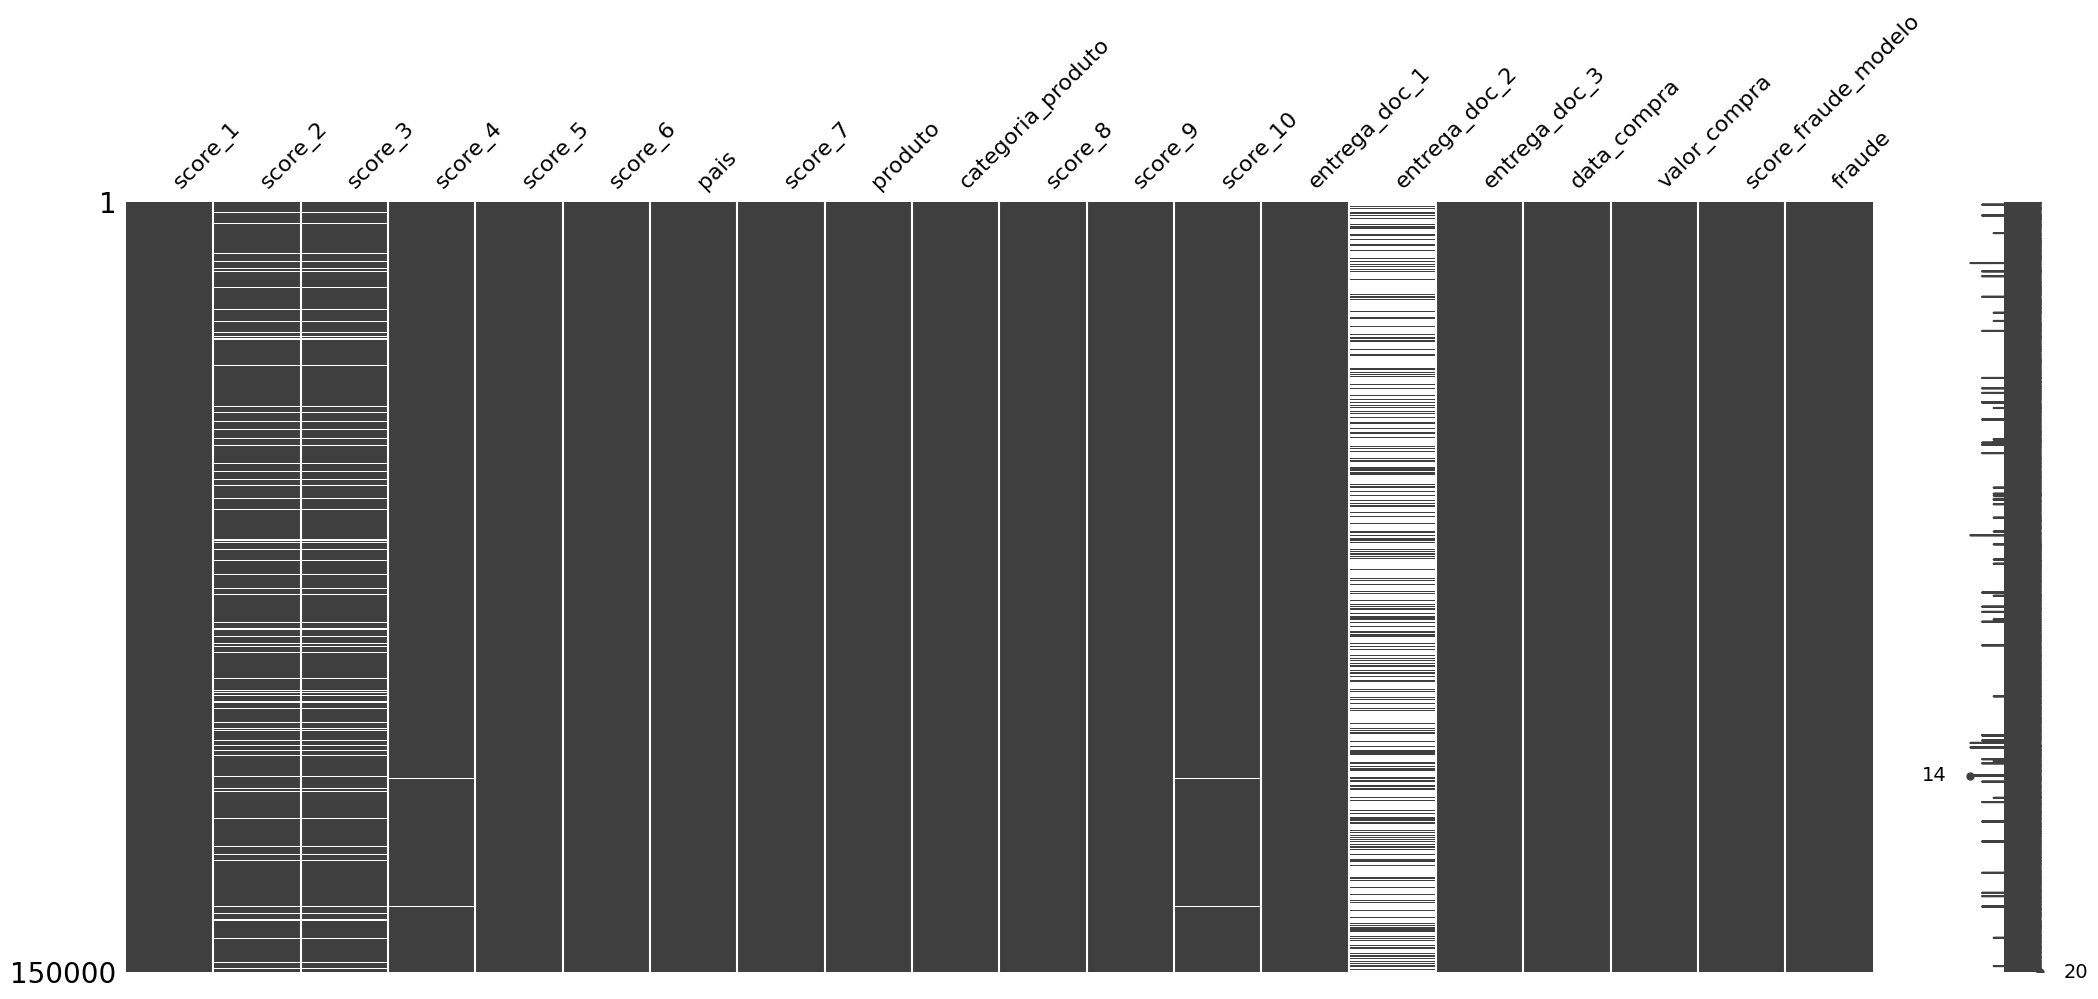

In [7]:
#visualizing the missing values in
missingno.matrix(df)

As seen above, we see that the column entrega_doc_2 has more than 70% of null values. Instead of eliminating this column from the analyses, we will create a boolean column indicating whether the record was a missing one or not. Furthermore, we will conduct a more careful analysis because a customer failing to provide a document could be a pattern of a fraudulent customer.

In [8]:
# creating boolean column to identify a null values in entrega_doc_2
df['entrega_doc_2_nan'] = np.where(df['entrega_doc_2'].isnull(), 1, 0)

In [9]:
# verify datatypes
df.dtypes

score_1                         int64
score_2                       float64
score_3                       float64
score_4                       float64
score_5                       float64
score_6                       float64
pais                           object
score_7                         int64
produto                        object
categoria_produto              object
score_8                       float64
score_9                       float64
score_10                      float64
entrega_doc_1                   int64
entrega_doc_2                  object
entrega_doc_3                  object
data_compra            datetime64[ns]
valor_compra                  float64
score_fraude_modelo             int64
fraude                          int64
entrega_doc_2_nan               int32
dtype: object

All data is correctly typed.

In [10]:
df.describe()

,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,entrega_doc_1,data_compra,valor_compra,score_fraude_modelo,fraude,entrega_doc_2_nan
count,150000.000000,137016.000000,1.370160e+05,149635.000000,150000.000000,149989.000000,150000.000000,150000.000000,149989.000000,149635.000000,150000.000000,150000,150000.000000,150000.000000,150000.000000,150000.000000
mean,3.705407,0.728115,2.604451e+05,21.677669,0.220641,51.169352,14.193513,0.497532,2305.409403,299.969579,0.902353,2020-03-30 23:41:40.546252800,43.523134,48.066240,0.050000,0.725713
min,1.000000,0.000000,1.600000e-01,0.000000,0.000000,-5.000000,0.000000,0.000004,0.000000,0.000000,0.000000,2020-03-08 00:02:15,0.020000,0.000000,0.000000,0.000000
25%,4.000000,0.678400,9.679915e+03,2.000000,0.000000,1.000000,3.000000,0.246819,910.000000,42.000000,1.000000,2020-03-18 12:40:32.249999872,9.380000,23.000000,0.000000,0.000000
50%,4.000000,0.755500,4.371165e+04,14.000000,0.104875,8.000000,9.000000,0.495990,1937.000000,193.000000,1.000000,2020-03-31 00:08:33,20.610000,48.000000,0.000000,1.000000
75%,4.000000,0.806500,1.454436e+05,50.000000,0.282938,33.000000,21.000000,0.746508,3445.000000,459.000000,1.000000,2020-04-12 12:40:16,40.692500,73.000000,0.000000,1.000000
max,4.000000,1.000000,1.387874e+07,50.000000,833.333333,145274.000000,58.000000,0.999995,7544.000000,2225.000000,1.000000,2020-04-21 23:59:56,3696.350000,100.000000,1.000000,1.000000
std,0.753206,0.132943,8.464361e+05,20.062146,2.434995,709.472904,14.161216,0.288348,1712.379601,321.075806,0.296837,NaN,91.557888,28.995122,0.217946,0.446156


The column score_1 contain values from 1 to 4. So we can interprete it as a categorical column. Lets's check about it in the nex session.

## **2. Descriptive Analysis:**

### 2.1. Univariate

* **Categorical Columns:**

In [11]:
#defining categorical coluns
cat_cols = ['score_1', 'pais', 'produto', 'categoria_produto', 'entrega_doc_1','entrega_doc_2', 'entrega_doc_3']

for col in cat_cols:
  # counting % of values per col
  count = df[col].value_counts(normalize=True)
  print(f"Percentage of registers for {col}:")
  print(count)
  print("="*50)

Percentage of registers for score_1:
score_1
4    0.857193
2    0.095853
1    0.027967
3    0.018987
Name: proportion, dtype: float64
Percentage of registers for pais:
pais
BR    0.745150
AR    0.213369
UY    0.019806
US    0.015173
SE    0.002390
MX    0.001575
RU    0.000487
ES    0.000461
CO    0.000427
GB    0.000287
FR    0.000120
IT    0.000093
PT    0.000087
DE    0.000060
CL    0.000060
PE    0.000033
EC    0.000027
PY    0.000027
AU    0.000020
PA    0.000020
CA    0.000020
UA    0.000020
BE    0.000020
CN    0.000020
CH    0.000020
NZ    0.000020
PR    0.000013
NL    0.000013
BO    0.000013
CR    0.000013
AE    0.000013
LB    0.000013
FI    0.000007
TW    0.000007
NO    0.000007
EG    0.000007
IL    0.000007
PH    0.000007
JP    0.000007
GH    0.000007
NI    0.000007
DO    0.000007
BS    0.000007
TR    0.000007
IN    0.000007
GR    0.000007
HN    0.000007
KR    0.000007
GE    0.000007
AD    0.000007
ZA    0.000007
Name: proportion, dtype: float64
Percentage of registers for p

We will plot these columns in a plot to visualize the quantity, But we will skip "categoria_produto" and "produto" because there too many unique values. So we will analyze separeted.

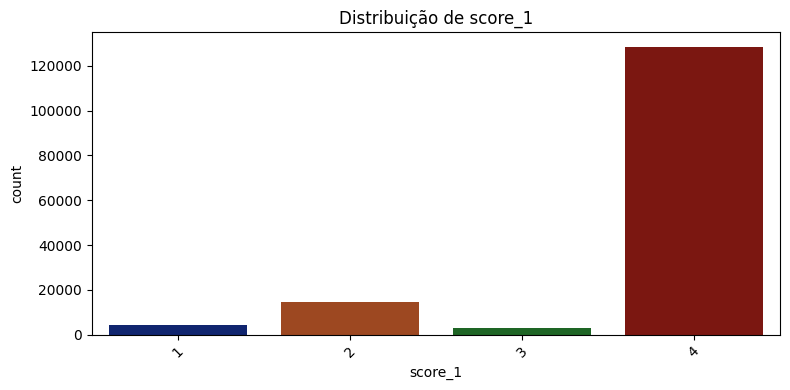

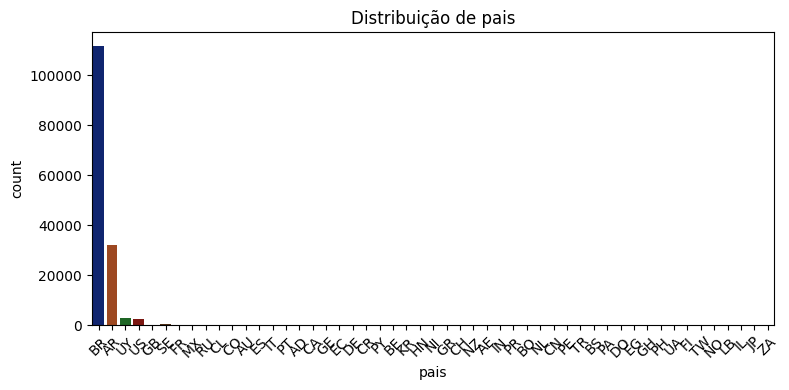

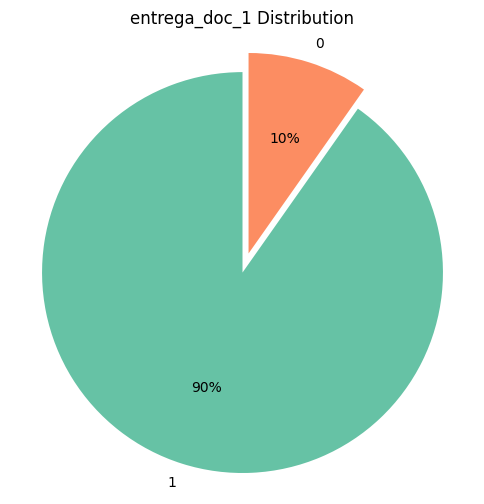

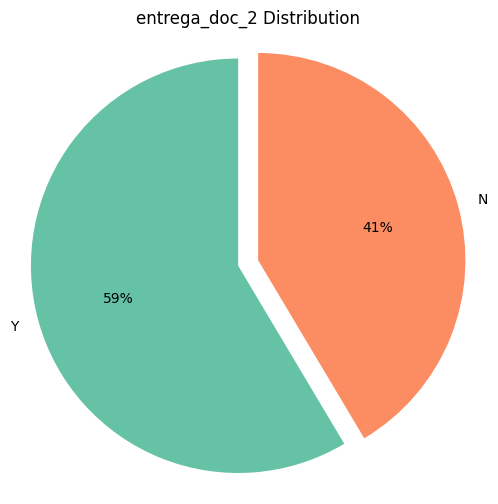

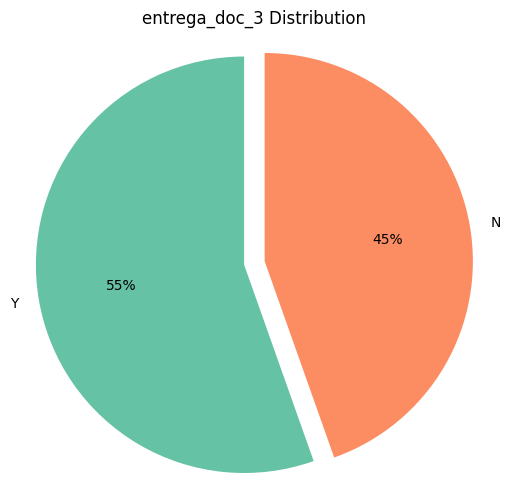

In [12]:
columns_cat_plot = cat_cols = ['score_1', 'pais', 'entrega_doc_1','entrega_doc_2', 'entrega_doc_3']
for col in cat_cols:
    unique_vals = df[col].nunique()

    if unique_vals > 2:
        # Count Plot 
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, palette='dark')
        plt.title(f'Distribuição de {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        # Pie Plot
        counts = df[col].value_counts()
        labels = counts.index
        sizes = counts.values

        explode = [0.1 if i == 0 else 0 for i in range(len(labels))]  # highlight the first item
        palette_color = sns.color_palette('Set2')

        plt.figure(figsize=(6, 6))
        plt.pie(sizes, labels=labels, colors=palette_color[:len(labels)],
                explode=explode, autopct='%.0f%%', startangle=90)
        plt.title(f'{col} Distribution')
        plt.axis('equal')
        plt.show()


**Analysis:**

We see in the graphs above that the majority of users have a score_1 of 4 and predominantly (about 90% of users) are in Brazil or Argentina. Therefore, we will group all these records into: Brazil, Argentina, and Others.

Regarding the submission of documents, we have a significant difference between people who submitted document type 1 and those who did not.

With this, we will now check if:

- There are fraudsters in both groups (submission_doc_1: Yes or No)
- Product_category
- Products

In [13]:
# redefining category countries
df['paises_agrupados'] = np.where(df['pais'].isin(['BR', 'AR']), df['pais'], 'Outros')

In [14]:
# verify categoria_produto
print(df['categoria_produto'].value_counts())

categoria_produto
cat_43b9c10    2331
cat_d69bed9    1799
cat_604df77    1784
cat_6c4cfdc    1449
cat_4249bd8    1191
               ... 
cat_0d1c81b       1
cat_4fc8b8b       1
cat_9ba475f       1
cat_75e1eaf       1
cat_45b507c       1
Name: count, Length: 8324, dtype: int64


In [15]:
#verify produt
print(df['produto'].value_counts())

produto
Fone De Ouvido Sem Fio Xiaomi Airdots Preto                     83
Xiaomi Redmi Note 8 Dual Sim 64 Gb Azul-netuno 4 Gb Ram         51
Clean Sept - Álcool Em Gel 70% 500 Ml                           49
Tapete Ilustrativo Pista Carrinho Hot Wheels 0,60x1,20m         47
Máscara Descartável Tripla Com Elástico Proteção Anvisa 50un    47
                                                                ..
Bateria Zetta, Nova, Com Nota Fiscal, 12 Mês De Garantia         1
Dispenser Jabón Liquido / Alcohol En Gel X Unidad                1
Moletom Gola Redonda Shawn Mendes Top 98 Unissex Promoção        1
Placa Interface Adesivo Lavadora Brastemp Bwl11 Emicol Biv.      1
A Magia Divina Das Velas. O Livro Das Sete Chamas Sagradas       1
Name: count, Length: 127804, dtype: int64


In these last two categories, we see that when looking at products, we have a very large dimensionality.

The best-selling product only sold 83 units, while we have many products with only 1 unit sold.

This large variation will not help the model to identify patterns. Therefore, we will eliminate it from the model.

Now regarding the product category, we will plot it in a cumulative line chart to try to see which categories are the best sellers.

,categoria_produto,qnt_registros,fraude,percent_cumsum_fraude
0,cat_43b9c10,2331,380,5.066667
1,cat_d9753d4,453,115,6.600000
2,cat_4249bd8,1191,98,7.906667
3,cat_8ef7164,909,81,8.986667
4,cat_6c4cfdc,1449,74,9.973333
...,...,...,...,...
995,cat_7a09643,1,1,87.160000
996,cat_c00e77d,1,1,87.173333
997,cat_60244b6,11,1,87.186667
998,cat_bbb2c30,1,1,87.200000


<Axes: >

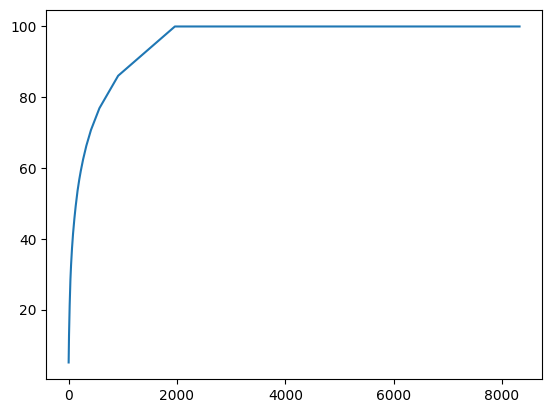

In [16]:
# Count total rows per category
item_cat = df.categoria_produto.value_counts().reset_index()
item_cat.columns = ['categoria_produto', 'qnt_registros']  # <- FIX: renaming columns

# Sum of frauds per category
fraude_cat = df.groupby('categoria_produto')['fraude'].sum().reset_index()

# Merge both
df_item_fraude = pd.merge(item_cat, fraude_cat, on='categoria_produto', how='left')

# Sort by number of frauds (descending)
df_item_fraude = df_item_fraude.sort_values(by='fraude', ascending=False).reset_index(drop=True)

# Cumulative fraud percentage
df_item_fraude['percent_cumsum_fraude'] = df_item_fraude['fraude'].cumsum() / df['fraude'].sum() * 100

# Display
display(df_item_fraude[0:1000])
df_item_fraude['percent_cumsum_fraude'].plot()



In [17]:
# Verify where we have 80% of fraud

# 1. Sort categories by number of frauds in descending order
df_item_fraude = df_item_fraude.sort_values(by='fraude', ascending=False).reset_index(drop=True)

# 2. Calculate cumulative percentage of frauds
df_item_fraude['percent_cumsum_fraude'] = df_item_fraude['fraude'].cumsum() / df['fraude'].sum() * 100

# 3. Mark which categories are within the first 80% of accumulated frauds
df_item_fraude['reaches_80'] = df_item_fraude['percent_cumsum_fraude'] <= 80

# 4. Count how many categories fall into that 80%
num_categories_80 = df_item_fraude['reaches_80'].sum()

# 5. Calculate the percentage these categories represent out of the total number of categories
percent_categories_80 = num_categories_80 / len(df_item_fraude) * 100

# 6. Display the conclusion
print(f"{num_categories_80} categories account for 80% of frauds, which represents {percent_categories_80:.2f}% of all categories.")

685 categories account for 80% of frauds, which represents 8.23% of all categories.


We have that 8% of fraudsters are concentrated in 685 categories, which represent approximately 8.23% of the dataset.

We will keep only these 8.23% and group the remainder as Others.

In [18]:
# Selects the less frequent categories (after the top 1000 most fraudulent ones)
produtos_categorias = df_item_fraude[685:]

# Extracts their names into a list
lista_categorias_outros = produtos_categorias.categoria_produto.to_list()

# Creates a new column copying the original category
df['grupo_categorias'] = df["categoria_produto"]

# Replaces small categories with the label "categorias_outros"
df.loc[df["grupo_categorias"].isin(lista_categorias_outros), "grupo_categorias"] = "categorias_outros"

In [19]:
df.grupo_categorias.value_counts()

grupo_categorias
categorias_outros    60006
cat_43b9c10           2331
cat_d69bed9           1799
cat_604df77           1784
cat_6c4cfdc           1449
                     ...  
cat_4a6ba1e              5
cat_77e7456              4
cat_e6bbd94              4
cat_9f91c66              4
cat_34d64b6              3
Name: count, Length: 686, dtype: int64

Let's check the balance of the target. ...

In [20]:
df.fraude.value_counts(normalize=True)


fraude
0    0.95
1    0.05
Name: proportion, dtype: float64

We have here a highly unbalanced dataset. This is to be expected, as we anticipate there will be fewer fraudulent cases.

* **Numerical Columns:**

In [21]:
# describe only for numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].describe()

,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,entrega_doc_1,valor_compra,score_fraude_modelo,fraude
count,150000.000000,137016.000000,1.370160e+05,149635.000000,150000.000000,149989.000000,150000.000000,150000.000000,149989.000000,149635.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,3.705407,0.728115,2.604451e+05,21.677669,0.220641,51.169352,14.193513,0.497532,2305.409403,299.969579,0.902353,43.523134,48.066240,0.050000
std,0.753206,0.132943,8.464361e+05,20.062146,2.434995,709.472904,14.161216,0.288348,1712.379601,321.075806,0.296837,91.557888,28.995122,0.217946
min,1.000000,0.000000,1.600000e-01,0.000000,0.000000,-5.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000
25%,4.000000,0.678400,9.679915e+03,2.000000,0.000000,1.000000,3.000000,0.246819,910.000000,42.000000,1.000000,9.380000,23.000000,0.000000
50%,4.000000,0.755500,4.371165e+04,14.000000,0.104875,8.000000,9.000000,0.495990,1937.000000,193.000000,1.000000,20.610000,48.000000,0.000000
75%,4.000000,0.806500,1.454436e+05,50.000000,0.282938,33.000000,21.000000,0.746508,3445.000000,459.000000,1.000000,40.692500,73.000000,0.000000
max,4.000000,1.000000,1.387874e+07,50.000000,833.333333,145274.000000,58.000000,0.999995,7544.000000,2225.000000,1.000000,3696.350000,100.000000,1.000000


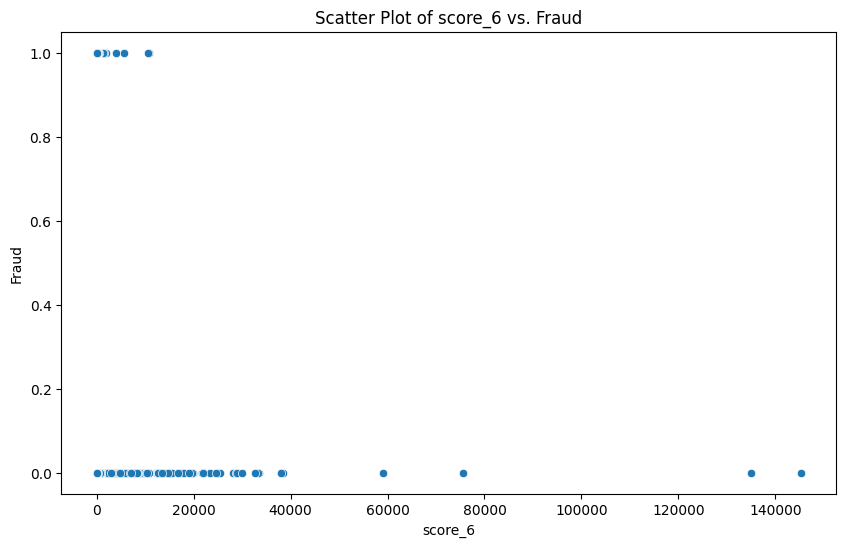

In [22]:
#plot scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['score_6'], y=df['fraude'])
plt.title(f'Scatter Plot of score_6 vs. Fraud')
plt.xlabel('score_6')
plt.ylabel('Fraud')
plt.show()

We have very high values for score_6, which may be outliers. This should be discussed with the business team to verify the nature of the score and whether it represents reality or if it is some error that should be disregarded.

Let’s assume here that they are indeed real, so we will keep them.

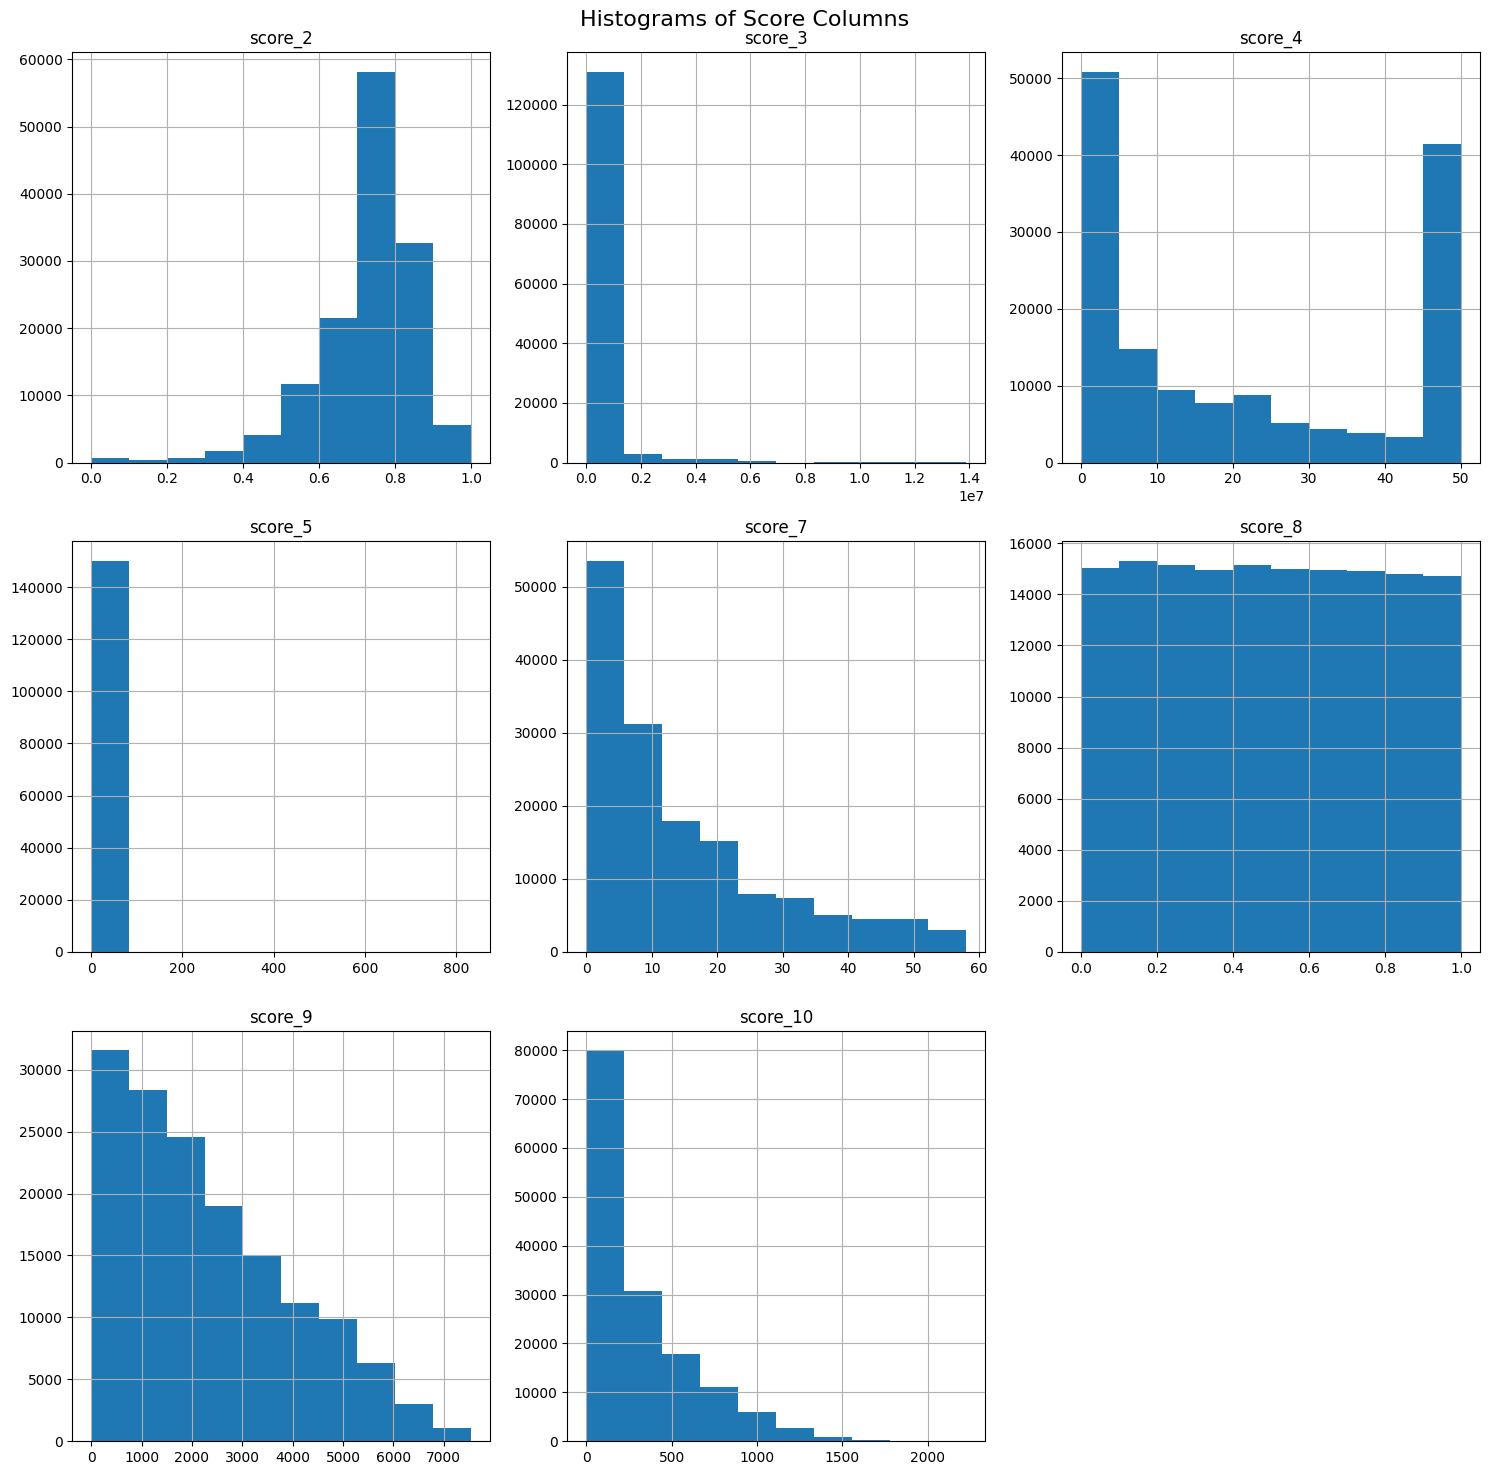

In [23]:
# selecting columns to plot histogram

axarr= df[['score_2','score_3','score_4', 'score_5','score_7', 'score_8', 'score_9', 'score_10']].hist(figsize=(15,15))

# Add a unique title
plt.gcf().suptitle('Histograms of Score Columns', fontsize=16)

plt.tight_layout()
plt.show()



From the graphs above, it is possible to see that:

- In scores 7, 9, and 10 there is right skewness, meaning we have more people with lower scores;
- In score 2, we have more people with high scores, as the skewness is to the left.
- Score 8 is more uniform.
- In score 4, we basically have the records divided into two groups: either very high scores or very low scores.

Let's check now regarding the correlation of the variables:

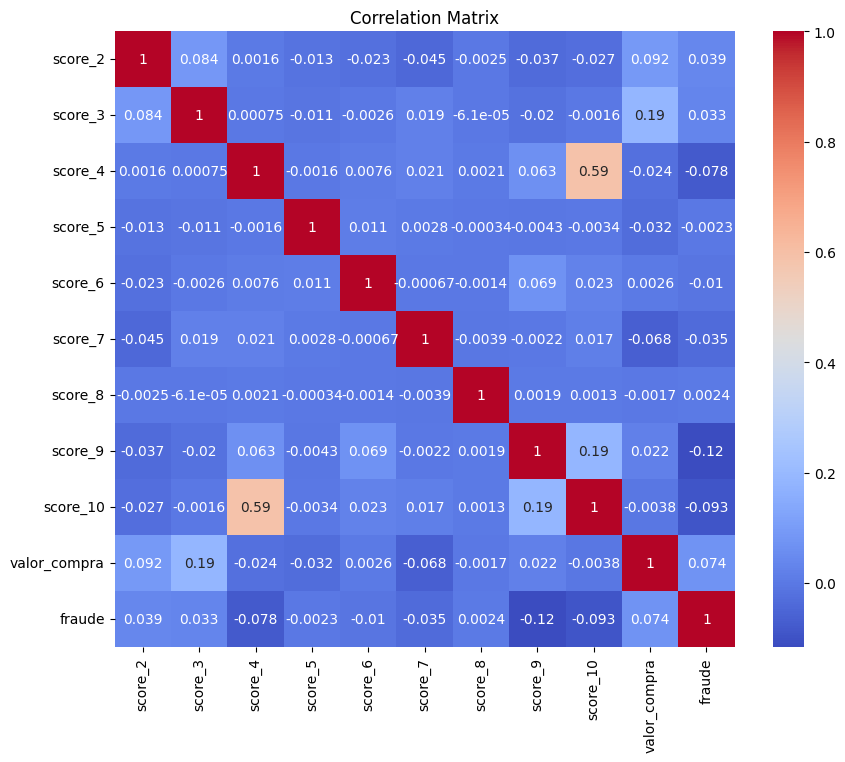

In [24]:
corr = df[['score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10', 'valor_compra', 'fraude']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

There is a higher correlation between score_4 and score_10. But since it is not above 0.7, we will keep the variables.

## **3. Hypothesis Tests:**

Now let's understand fraud patterns in the dataset. To do this, we will raise some hypotheses that will be tested.

---

1. **Relationship between scores and fraud**

   📌 Hypothesis: Transactions with low scores have a higher fraud rate.

   🔍 Test: Analyze the distribution of scores (score\_1 to score\_10) for fraudulent and non-fraudulent transactions.

2. **Impact of country on fraud rate**

   📌 Hypothesis: Countries with a higher number of transactions have higher fraud rates.

   🔍 Test: Check how the number of transactions varies between countries and how this may impact fraud analysis.

3. **Influence of purchase amount on fraud**

   📌 Hypothesis: Very high or very low purchase amounts are more prone to fraud.

   🔍 Test: Create histograms and boxplots to compare purchase\_amount between fraudulent and non-fraudulent transactions.

4. **Correlation between document delivery and fraud**

   📌 Hypothesis: Transactions where documents were delivered (entrega\_doc\_1, entrega\_doc\_2, entrega\_doc\_3) have a lower fraud rate.

   🔍 Test: Check the fraud rate in transactions with and without document delivery.

5. **Relationship between purchase date and fraud**

   📌 Hypothesis: Frauds happen more frequently during certain periods (times of day, days of the week, weekends vs. weekdays).

   🔍 Test: Create new variables for day of the week and time, and analyze the distribution of fraud in these periods.

6. **Fraud model score and its accuracy**

   📌 Hypothesis: The fraud\_model\_score is a good predictor of fraud.
   
   🔍 Test: Compare the distribution of this score for fraudulent and non-fraudulent transactions.

These hypotheses will serve as a foundation for our exploratory analysis and help us better understand the fraud patterns present in the data.


### **3.1.  Hypothesis 1: Relationship between scores and fraud**

First we will check how is the distribution of frauds and non frauds in each score.

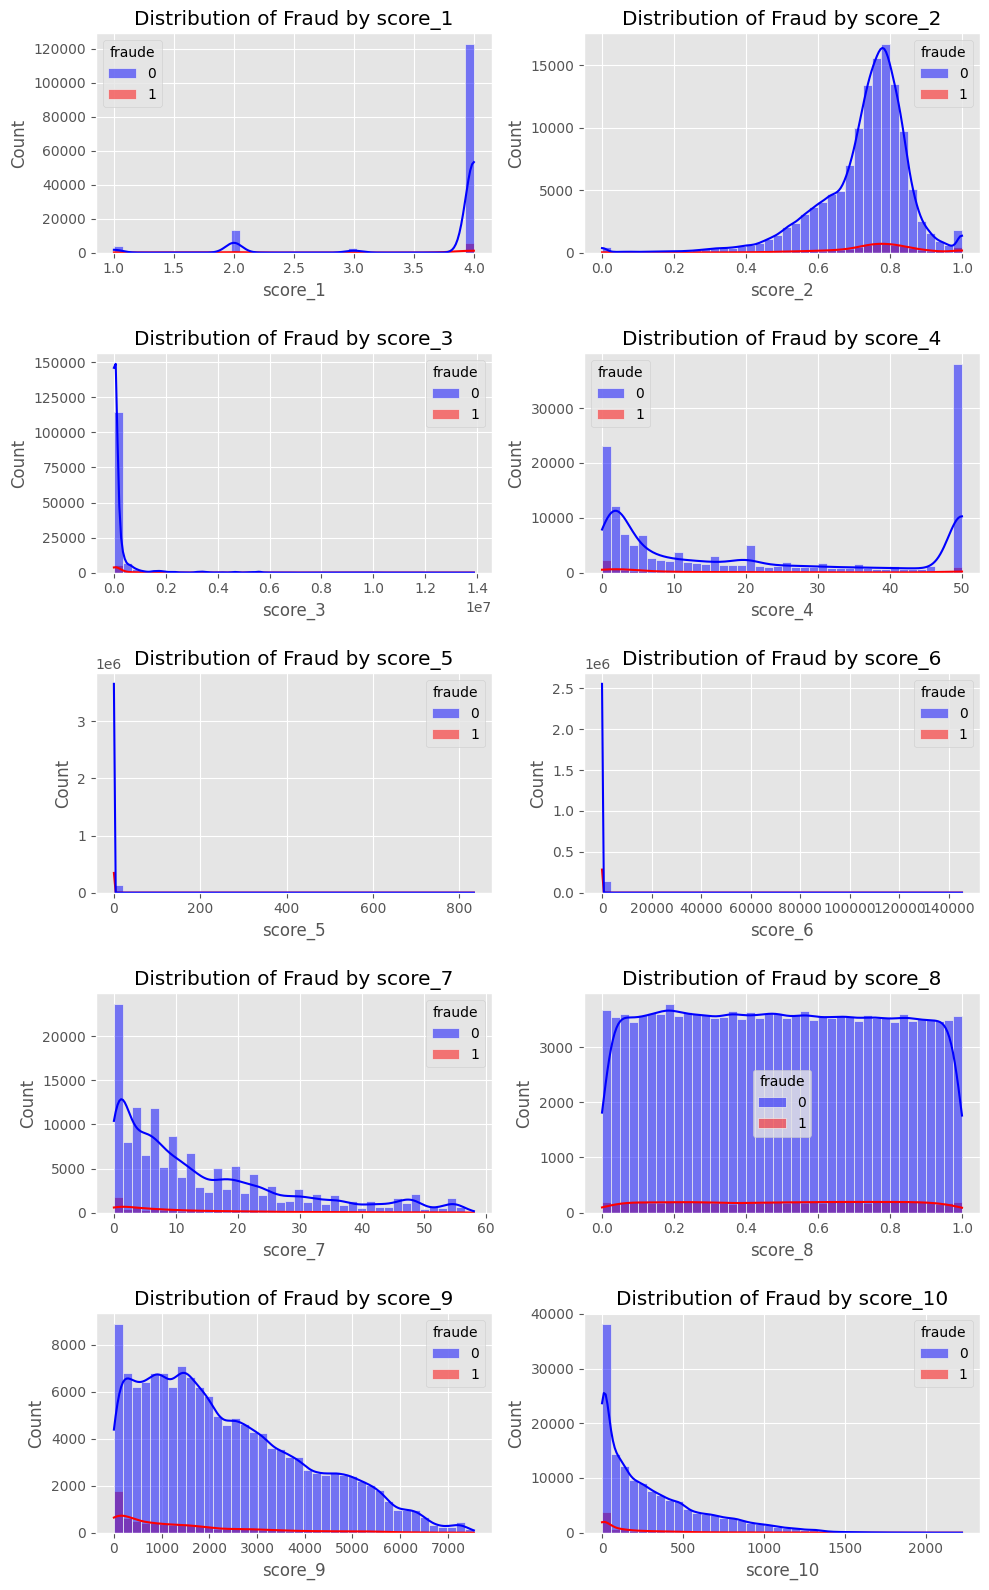

In [25]:
# setting of graph style
plt.style.use("ggplot")

#create plot columns list
score_columns=["score_1", "score_2", "score_3", "score_4", "score_5", "score_6", "score_7", "score_8", "score_9", "score_10"]

#create a graph for each score_column
fig, axes = plt.subplots(5, 2, figsize=(10,16))
axes=axes.flatten()

for i, score in enumerate(score_columns):
    sns.histplot(data=df, x=score, hue="fraude", bins=40, kde=True, ax=axes[i], palette=["blue", "red"])
    axes[i].set_title(f"Distribution of Fraud by {score}")

plt.tight_layout()
plt.show()

From the histograms above, we can verify that:

- `score_1` has concentrations in specific locations, which indicates that this column is not continuous.

- In `score_2`, we see a slight increasing trend as the score increases.

- In `score_7`, `score_9`, and `score_10`, there is a sharp decline in the volume of legitimate transactions as the score increases. And fraudulent transactions follow this trend.

In the other scores, we have either very uniform data or very asymmetric data. And the latter can have an impact on statistical analyses.

In [26]:
# calculate mean, median of fraud and non-fraud for each score columns
df_fraud = df[df['fraude']== 1]
df_non_fraud = df[df['fraude']== 0]

#Create dataframe to store the results
stats = pd.DataFrame(columns=["Média (Fraude)", "Mediana (Fraude)", "Média (Não Fraude)", "Mediana (Não Fraude)"])

for score in score_columns:
  stats.loc[score]=[df_fraud[score].mean(),
                    df_fraud[score].median(),
                    df_non_fraud[score].mean(),
                    df_non_fraud[score].median()]

stats


,Média (Fraude),Mediana (Fraude),Média (Não Fraude),Mediana (Não Fraude)
score_1,3.509467,4.000000,3.715719,4.000000
score_2,0.750986,0.770400,0.726945,0.754800
score_3,384770.684747,49068.520000,254082.178440,43479.520000
score_4,14.868425,5.000000,22.035508,15.000000
score_5,0.196641,0.015522,0.221904,0.108192
score_6,18.733067,1.000000,52.876657,9.000000
score_7,12.041467,7.000000,14.306779,9.000000
score_8,0.500543,0.507139,0.497374,0.495427
score_9,1431.975867,956.500000,2351.383138,1989.000000
score_10,169.102128,56.000000,306.846923,202.000000


**1- Scores with significant differences between fraud and non-fraud:**

- `score_3`: The average and median of fraudulent transactions are much higher than those of non-fraudulent transactions. This indicates that frauds generally receive a higher score_3.

- `score_4`: The average and median for frauds are much lower than for legitimate transactions. This indicates that fraudulent transactions receive a lower score here.

- `score_6`: The difference between fraud and non-fraud is quite significant in both the average and median, indicating that fraudulent transactions have lower scores.

- `score_9` and `score_10`: Frauds have much lower average and median values than non-frauds. This may indicate that legitimate transactions tend to have higher scores in these attributes.

Let's apply a T-Student hypothesis test here to assess whether the differences between the means are statistically significant.

In [27]:
# create a dictionary to storage the p_values from the tests
p_values={}

#Apply the t-test for each score
for score in score_columns:
  if score != "score_1":
    t_stat, p_val = ttest_ind(df_fraud[score], df_non_fraud[score], equal_var=False, nan_policy="omit")
    p_values[score] = p_val

#show the results
df_pvalues = pd.DataFrame.from_dict(p_values, orient="index", columns=["P_Value"]).sort_values(by="P_Value")
df_pvalues

,P_Value
score_9,0.000000e+00
score_10,0.000000e+00
score_4,5.322899e-230
score_7,3.336543e-45
score_2,1.351590e-36
score_6,1.158479e-29
score_3,6.636891e-22
score_5,1.321446e-02
score_8,3.543729e-01


**Hypothesis:**

- Ho: equal means
- Ha: differents means

In [28]:
# ANSI codes to colors and stayles
GREEN_BOLD = '\033[1;32m'
RED = '\033[31m'
RESET = '\033[0m'

for score, p_val in df_pvalues['P_Value'].items():
    if p_val < 0.05:
        print(f"{GREEN_BOLD}{score}: p-value = {p_val:.2e} → Means are statistically DIFFERENT (reject H0){RESET}\n")
    else:
        print(f"{RED}{score}: p-value = {p_val:.2e} → Means are NOT statistically different (fail to reject H0){RESET}\n")


score_9: p-value = 0.00e+00 → Means are statistically DIFFERENT (reject H0)

score_10: p-value = 0.00e+00 → Means are statistically DIFFERENT (reject H0)

score_4: p-value = 5.32e-230 → Means are statistically DIFFERENT (reject H0)

score_7: p-value = 3.34e-45 → Means are statistically DIFFERENT (reject H0)

score_2: p-value = 1.35e-36 → Means are statistically DIFFERENT (reject H0)

score_6: p-value = 1.16e-29 → Means are statistically DIFFERENT (reject H0)

score_3: p-value = 6.64e-22 → Means are statistically DIFFERENT (reject H0)

score_5: p-value = 1.32e-02 → Means are statistically DIFFERENT (reject H0)

score_8: p-value = 3.54e-01 → Means are NOT statistically different (fail to reject H0)



From the above p_values, we see that:

- The `score_2`, `score_3`, `score_4`, `score_6`, `score_7`, `score_9`, and `score_10` have highly significant differences. This indicates that they are indeed important for differentiating a fraudster from a non-fraudster.

- Meanwhile, `score_5` has a p_value below 0.05, but not as extreme as the previous ones. In other words, it may still have some influence in identifying a fraud, but it may not be strong enough for prediction.



**Summary of Conclusions**

✅Important scores to predict fraud: `score_9`, `score_10`, `score_4`, `score_7`, `score_2`, `score_6`, `score_3`.

⚠️ Score with moderate influence: `score_5`.

❌ Score probably irrelevant: `score_8`.

To verify regarding the `score_1`, since it is categorical, we will use the **Chi-Square** test, because we are interested in figuring out if the category of the score (1, 2, 3, 4) is associated with fraud (yes or no)?

In [29]:
from scipy import stats
# create contingency table
contigency_table = pd.crosstab(df['score_1'], df['fraude'])

# apply chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contigency_table)

if p_value < 0.05:
    print("There is a statistically significant association between score category and fraud rate.\n")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-value: {p_value}")
    print(f"Degrees of Freedom: {dof}")
else:
    print("No statistically significant association between score category and fraud rate.")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-value: {p_value}")
    print(f"Degrees of Freedom: {dof}")

There is a statistically significant association between score category and fraud rate.

Chi-Square Statistic: 584.4465798546843
P-value: 2.371872621590785e-126
Degrees of Freedom: 3


The p-value of the test was much lower than the significance level, therefore we have a significant association between this score and whether a transaction is fraudulent or not.

 ### 3.2 Hypothesis 2: Countries with a higher number of transactions have higher fraud rates.

Here, we have the same previous case. Since we want to see if there is a significant difference between the average of frauds among countries, we will apply a Chi-Squared test.

In [30]:

# creating the contingency table
contigency_table = pd.crosstab(df['paises_agrupados'], df['fraude'])

# applying the chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contigency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}\n")

if p_value < 0.05:
  print("There is a statistically significant association between score category and fraud rate.\n")
else:
  print("No statistically significant association between score category and fraud rate.\n")

Chi-Square Statistic: 264.8999721884502
P-value: 3.0040137148764052e-58
Degrees of Freedom: 2

There is a statistically significant association between score category and fraud rate.



Since we have a statistically significant difference, we will apply a post-hoc test to identify which pairs show this difference.

In [31]:
contigency_table = contigency_table.reset_index()
unique_groups = contigency_table['paises_agrupados'].unique()


print("Pairwise chi-square tests:")

for i in range(len(unique_groups)):
    for j in range(i + 1, len(unique_groups)):
        g1, g2 = unique_groups[i], unique_groups[j]

        # Filter only the countrys we are comparing
        sub_table = contigency_table[
            contigency_table['paises_agrupados'].isin([g1, g2])
        ].set_index('paises_agrupados')  # define the country as index 

        # Applies chi-square test
        chi2_posthoc, p_posthoc, _, _ = stats.chi2_contingency(sub_table)

        # show results
        print(f"Comparison between {g1} and {g2}:")
        print(f"Chi-Square Statistic: {chi2_posthoc:.4f}")
        print(f"P-value: {p_posthoc:.4f}")

        if p_posthoc < 0.05:
            print(f"\033[1;32mStatistically significant difference between {g1} and {g2}.\033[0m\n")
        else:
            print(f"\033[31mNo statistically significant difference between {g1} and {g2}.\033[0m\n")




Pairwise chi-square tests:
Comparison between AR and BR:
Chi-Square Statistic: 171.4645
P-value: 0.0000
Statistically significant difference between AR and BR.

Comparison between AR and Outros:
Chi-Square Statistic: 22.7599
P-value: 0.0000
Statistically significant difference between AR and Outros.

Comparison between BR and Outros:
Chi-Square Statistic: 109.8169
P-value: 0.0000
Statistically significant difference between BR and Outros.



This feature is important for the model. It means that the country is a strong indicator of fraud.

### 3.3. Hypothesis 3: Influence of purchase amount on fraud:

<Axes: xlabel='valor_compra', ylabel='Count'>

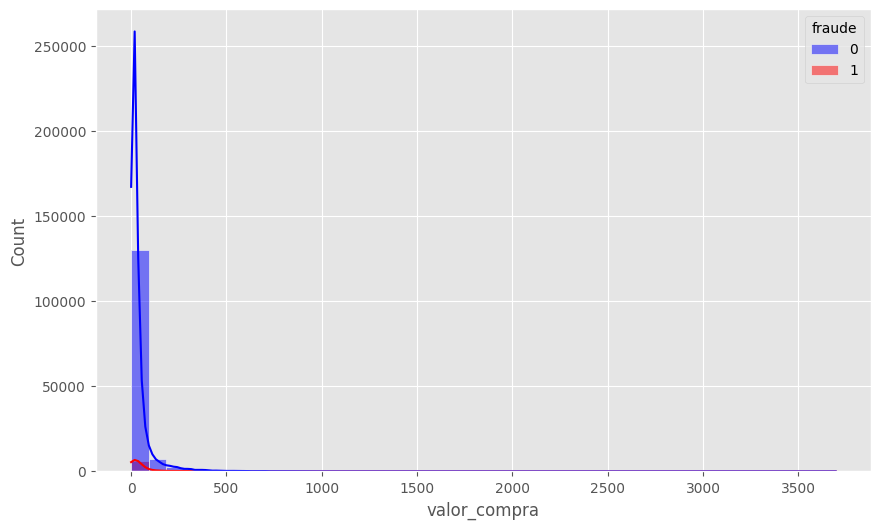

In [32]:
# histograms to compare purchase_value between fraud and no fraud
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="valor_compra", hue="fraude", bins=40, kde=True, palette=["blue", "red"])

Text(0, 0.5, 'Purchase Value')

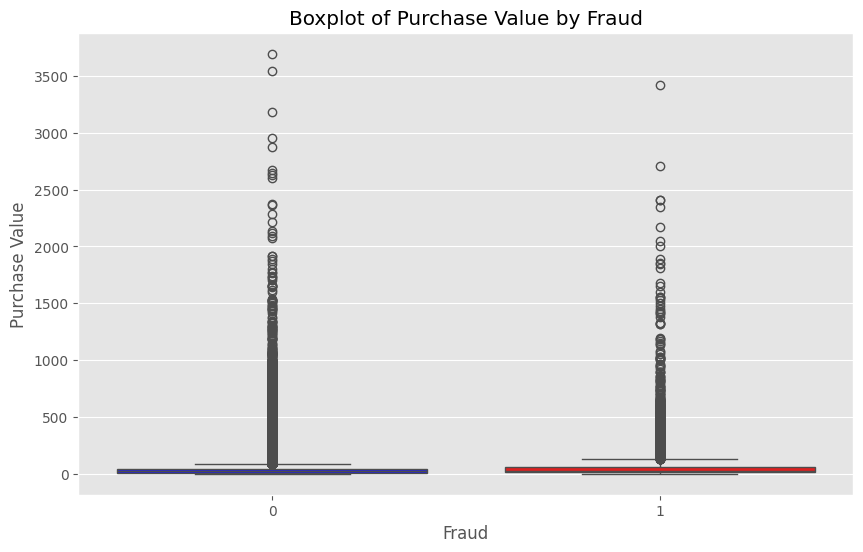

In [33]:
# visualize in boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="fraude", y="valor_compra", palette=["blue", "red"])
plt.title("Boxplot of Purchase Value by Fraud")
plt.xlabel("Fraud")
plt.ylabel("Purchase Value")

Let's perform a T-test to check if there is a statistically significant difference in the mean of purchases between fraud and non-fraud.

In [34]:
# separing the groups
fraude = df[df["fraude"]==1]["valor_compra"]
non_fraude = df[df["fraude"]==0]["valor_compra"]

# applying the t-test
t_stat, p_val = ttest_ind(fraude, non_fraude, equal_var=False, nan_policy="omit")

# show the test results
print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_val}")

if p_val < 0.05:
    print("There is a statistically significant difference in the mean of purchases between fraud and non-fraud.")
else:
    print("There is no statistically significant difference in the mean of purchases between fraud and non-fraud.")

T-Statistic: 16.169597915316714
P-value: 7.334288367307675e-58
There is a statistically significant difference in the mean of purchases between fraud and non-fraud.


### 3.4. Hypopthesis 4: Correlation between document delivery and fraud.

In [35]:
df.groupby("entrega_doc_2_nan")["fraude"].value_counts(normalize=True)

entrega_doc_2_nan  fraude
0                  0         0.87208
                   1         0.12792
1                  0         0.97945
                   1         0.02055
Name: proportion, dtype: float64

There is a significant difference in the fraud rate between those who were missing in this column. Therefore, it may be important for the model.

Let's look at the other document delivery columns.

In [36]:
df.groupby("entrega_doc_2")["fraude"].value_counts(normalize=True)

entrega_doc_2  fraude
N              0         0.782489
               1         0.217511
Y              0         0.935495
               1         0.064505
Name: proportion, dtype: float64

In [37]:
df.groupby("entrega_doc_3")["fraude"].value_counts(normalize=True)

entrega_doc_3  fraude
N              0         0.924048
               1         0.075952
Y              0         0.970877
               1         0.029123
Name: proportion, dtype: float64

In [38]:
# Replace Y/N by 1/O
df['entrega_doc_2'] = df['entrega_doc_2'].map({'Y':1, 'N':0})
df['entrega_doc_3'] = df['entrega_doc_3'].map({'Y': 1, 'N': 0})

# feature engineering: Create a new column indicating if some documment were delivered
df['entrega_doc'] = df[['entrega_doc_1', 'entrega_doc_2', 'entrega_doc_3']].any(axis=1).astype(int)

#Calculate the fraud rate for transactions with and without submitted documents.
fraude_per_doc = df.groupby('entrega_doc')['fraude'].mean().reset_index()

In [39]:
fraude_per_doc

,entrega_doc,fraude
0,0,0.162252
1,1,0.038059


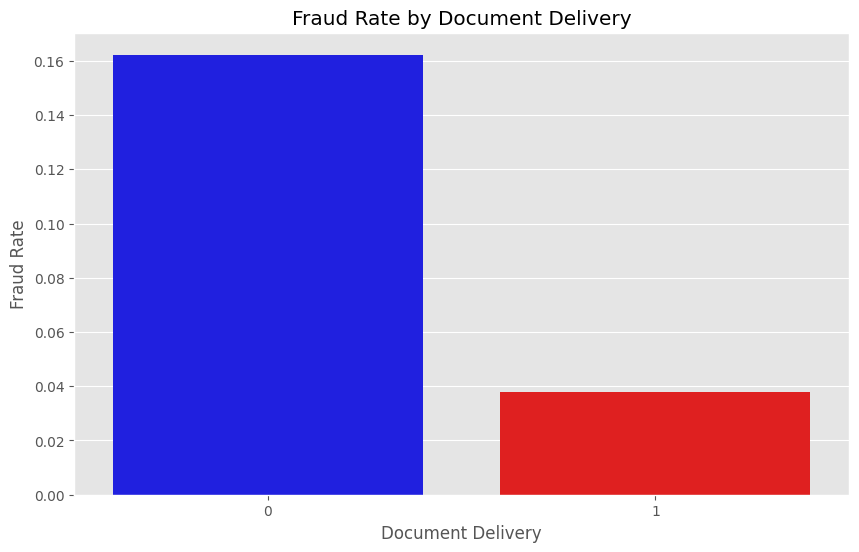

In [40]:
#visualize in a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=fraude_per_doc, x='entrega_doc', y='fraude', palette=["blue", "red"])
plt.title("Fraud Rate by Document Delivery")
plt.xlabel("Document Delivery")
plt.ylabel("Fraud Rate")
plt.show()


We see here that the fact of a person submitting any document significantly reduces the fraud rate. This suggests that this measure (submitting a document) is a good practice to reduce cases of fraud, as we have a much lower fraud rate among those who provide any documentation.

In [41]:
# separate in differents groups
fraude_com_doc = df[df["entrega_doc"]==1]["fraude"]
fraude_sem_doc = df[df["entrega_doc"]==0]["fraude"]

# Apply T-Test
t_stat, p_val = ttest_ind(fraude_com_doc, fraude_sem_doc, equal_var=False, nan_policy="omit")

# Show test results
print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_val}\n")

if p_val < 0.05:
    print("There is a statistically significant difference in the fraud rate between transactions with and without submitted documents.")
else:
    print("There is no statistically significant difference in the fraud rate between transactions with and without submitted documents.")

T-Statistic: -39.88492040446519
P-value: 0.0

There is a statistically significant difference in the fraud rate between transactions with and without submitted documents.


This validates the hypothesis that transactions with delivered documents do, in fact, have a different fraud rate than transactions without document delivery.

### 3.5. Hypothesis 5: Frauds happen more frequently during certain periods (times of day, days of the week, weekends vs. weekdays).

Frauds tend to happen more frequently on certain days of the week or at certain times. So, we will test this hypothesis. To do this, we will create new columns to be able to compare the fraud rate.

#### Steps:
1. **Create new variables**: We will create variables for the **day of the week** and **time of purchase** from the `data_compra` column.
2. **Analyze fraud distribution**: We will compare fraud rates on different days of the week, at different times, and also between weekends (Saturday and Sunday) and weekdays.
3. **Visualize the results**: We can use bar graphs or boxplots to visualize the distributions.
4. **Hypothesis Testing**:
    * Day of the week: Check if there is a significant difference in fraud rates between the days of the week.
    * Weekend vs weekdays: Check if fraud rates are significantly different between transactions made on the weekend and on weekdays.
    * Test the hypothesis about the time of day (whether transactions made at certain times have different fraud rates), we can apply an ANOVA test to compare fraud rates across different time intervals.

In [42]:
# Create new columns
df["dia_da_semana"]= df["data_compra"].dt.dayofweek # 0 = Segunda
df["hora_da_compra"] = df["data_compra"].dt.hour

# Create to identify weekend days
df["fim_de_semana"] = df["dia_da_semana"].isin([5, 6]).astype(int)

#Calculate fraud tax per day
fraude_por_dia = df.groupby("dia_da_semana")["fraude"].mean().reset_index()

#Calculate fraude tax per hour
fraude_por_hora = df.groupby("hora_da_compra")["fraude"].mean().reset_index()

#calculate fraude tax per weekend days
fraude_por_fim_de_semana = df.groupby("fim_de_semana")["fraude"].mean().reset_index()

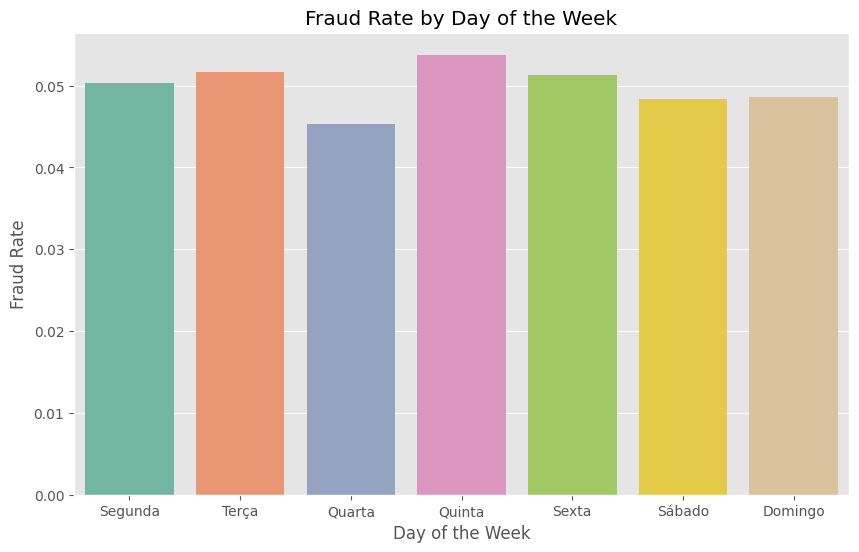

In [43]:
# visualize in a plot bar

plt.figure(figsize=(10, 6))
sns.barplot(data=fraude_por_dia, x='dia_da_semana', y='fraude', palette="Set2")
plt.title("Fraud Rate by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Fraud Rate")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
plt.show()

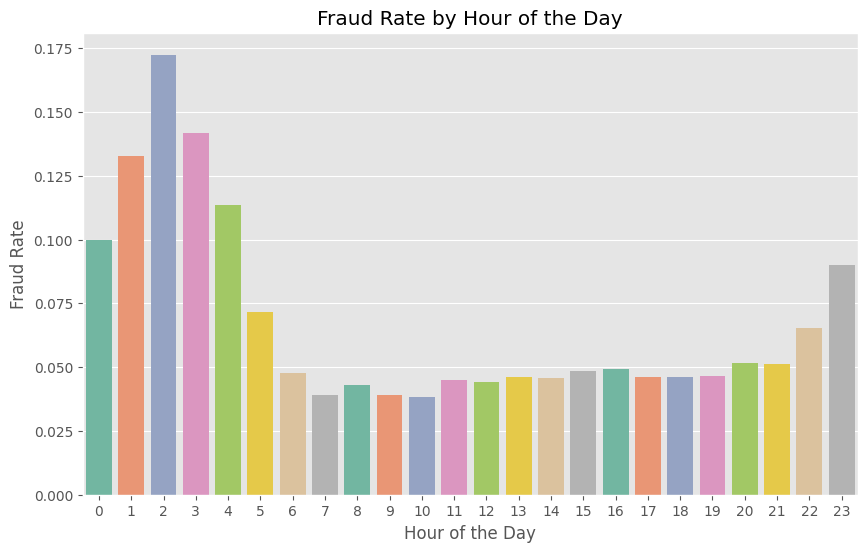

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(data=fraude_por_hora, x='hora_da_compra', y='fraude', palette="Set2")
plt.title("Fraud Rate by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Fraud Rate")
plt.show()

From the graphs above, we can observe that the fraud rate is higher during the **early morning**, followed by a period with a lower fraud rate (**morning**)

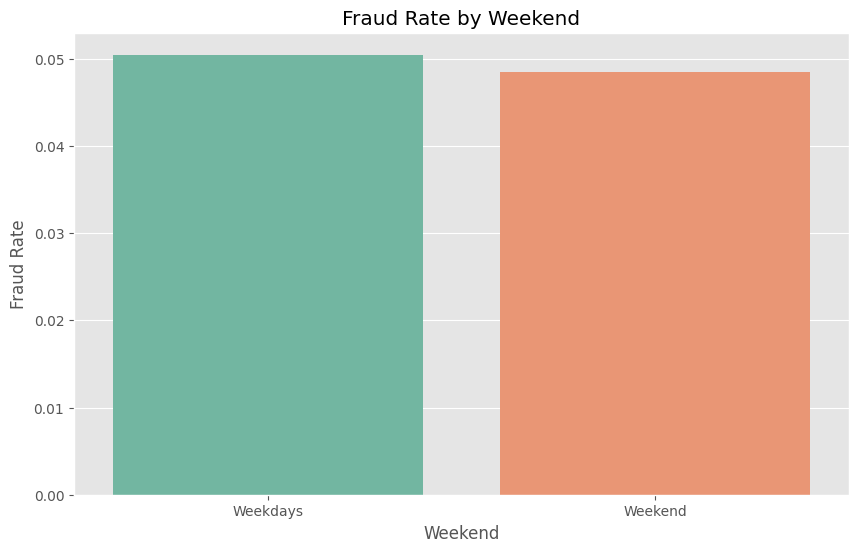

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(data=fraude_por_fim_de_semana, x='fim_de_semana', y='fraude', palette="Set2")
plt.title("Fraud Rate by Weekend")
plt.xlabel("Weekend")
plt.ylabel("Fraud Rate")
plt.xticks(ticks=[0, 1], labels=['Weekdays', 'Weekend'])
plt.show()

As we want to validate the hypothesis that there is a significant difference in the fraud rate between the days of the week, we will perform a Chi-square test.

In [46]:
# Chi-square Test: Days of week
contigency_dia = pd.crosstab(df['dia_da_semana'], df['fraude'])
chi2_stat_dia, p_value_dia, dof_dia, expected_dia = stats.chi2_contingency(contigency_dia)

# Chi-square Test: Weekdays vs Weekend
contingency_fim_de_semana = pd.crosstab(df['fim_de_semana'], df['fraude'])
chi2_stat_fim_de_semana, p_value_fim_de_semana, dof_fim_de_semana, expected_fim_de_semana = stats.chi2_contingency(contingency_fim_de_semana)

#Chi-square Test: Hour of the day
contigency_hora = pd.crosstab(df['hora_da_compra'], df['fraude'])
chi2_stat_hora, p_value_hora, dof_hora, expected_hora = stats.chi2_contingency(contigency_hora)

#Show the results
print("Chi-SquareTest - Days of Week\n")
print(f"Chi-Square Statistic (Days of Week): {chi2_stat_dia}")
print(f"P-value (Days of Week): {p_value_dia}")
if p_value_dia < 0.05:
    print("There is a statistically significant difference in fraud rates between the days of the week.\n")
else:
    print("There is no statistically significant difference in fraud rates between the days of the week.\n")

print("\n")

print("Chi-SquareTest - Weekdays vs Weekend\n")
print(f"Chi-Square Statistic (Weekdays vs Weekend): {chi2_stat_fim_de_semana}")
print(f"P-value (Weekdays vs Weekend): {p_value_fim_de_semana}")
if p_value_fim_de_semana < 0.05:
    print("There is a statistically significant difference in fraud rates between weekdays and weekends.\n")
else:
    print("There is no statistically significant difference in fraud rates between weekdays and weekends.\n")

print("\n")

print("Chi-SquareTest - Hour of the Day\n")
print(f"Chi-Square Statistic (Hour of the Day): {chi2_stat_hora}")
print(f"P-value (Hour of the Day): {p_value_hora}")
if p_value_hora < 0.05:
    print("There is a statistically significant difference in fraud rates between the hours of the day.\n")
else:
    print("There is no statistically significant difference in fraud rates between the hours of the day.\n")




Chi-SquareTest - Days of Week

Chi-Square Statistic (Days of Week): 20.644714998712377
P-value (Days of Week): 0.0021245914440300526
There is a statistically significant difference in fraud rates between the days of the week.



Chi-SquareTest - Weekdays vs Weekend

Chi-Square Statistic (Weekdays vs Weekend): 2.202975463596378
P-value (Weekdays vs Weekend): 0.13774462849295485
There is no statistically significant difference in fraud rates between weekdays and weekends.



Chi-SquareTest - Hour of the Day

Chi-Square Statistic (Hour of the Day): 841.6593861727897
P-value (Hour of the Day): 5.3030288311866235e-163
There is a statistically significant difference in fraud rates between the hours of the day.



With the above results, we realize that:

1. There is a significant difference in the fraud rate when we look at the time of day, indicating a strong impact on the fraud rate.

2. Although the p_value for the test between frauds during the weekdays was lower than the significance level, it is still very close to the limit. This may indicate that the impact is not very expressive, but it can still contribute to the model.

3. The fact that the transaction was made at the weekend, or during the week, may not have any impact on the fraud rate.

### Inital SetUp for MLFlow tracking

In [47]:
# Set tracking URI to save locally in the mlruns folder of your project
mlflow.set_tracking_uri("file:///C:/Users/vanes/Documents/02-Estudos/DataScienceProjects/Fraud-Prediction/mlruns")


# Create the MLflow client
client = MlflowClient()

# Experiment description (joined strings with space)
experiment_description = (
    "Project to detect fraud transactions. "
    "This experiment contains all tested models, metrics and configurations."
)

# Experiment tags
experiment_tags = {
    "project_name": "fraud_detection",
    "team": "personal_project",
    "target_model": "is:fraud",
    "project_type": "classification",
    "mlflow.note.content": experiment_description
}

# Check if the experiment already exists
experiment = client.get_experiment_by_name("Fraud_Project")

if experiment is None:
    # Create the experiment if it does not exist
    fraud_experiment_id = client.create_experiment(
        name="Fraud_Project",
        tags=experiment_tags
    )
else:
    # Retrieve the existing experiment ID
    fraud_experiment_id = experiment.experiment_id

print(f"Experiment ID: {fraud_experiment_id}")

Experiment ID: 639845368115827160


### Actions for the Model:

1. For the model, we will take the following columns:
- 'score_1',
- 'score_2',
- 'score_3',
- 'score_4',
- 'score_5',
- 'score_6',
- 'paises_agrupados,
- 'score_7',
- 'grupo_categorias'
- 'score_8',
- 'score_9',
- 'score_10',
- 'entrega_doc_1',
- 'entrega_doc_3',
- 'valor_compra',
- 'fraude',
- 'entrega_doc_2_nan',
- 'entrega_doc',
- 'hora_da_compra'


2. Exclude the column `score_fraude_modelo`, which is the baseline model and should not be used.
3.Exclude the column `data_compra` to avoid degrading the model over time.
4.Exclude the column `produto` due to high cardinality (more than 8,000 categories).
5. Keep the 1,000 categories in `categoria_produto` that correspond to 80% of the frauds.
6. Limit the `país` to BR, AR (which makes up more than 90% of the entire distribution) and others.
7. Fill the null values of score with the median, as they do not follow a normal distribution.
8. Create a feature `is_null` indicating which values of `entrega_doc_2` are null.
9. Consider the nulls in `entrega_doc_2` as 0, meaning not delivered.
10. Perform target encoding on the variable `categoria_produto` due to high cardinality.
11. Perform one-hot encoding on the other categorical variables.

## **4. Baseline Model:**

In [48]:
#selecting columns to the model

cols_to_use = ['score_1',
               'score_2',
               'score_3',
               'score_4',
               'score_5',
               'score_6',
               'score_7',
               'score_8',
               'score_9',
               'score_10',
               'entrega_doc_1',
               'entrega_doc_3',
               'valor_compra',
               'score_fraude_modelo',
               'fraude',
               'entrega_doc_2_nan',
               'paises_agrupados',
               'grupo_categorias',
               'entrega_doc',
               'hora_da_compra']

cols_encode = ['paises_agrupados', 'grupo_categorias']

In [49]:
#separte into features and target
X=df[cols_to_use].drop('fraude', axis=1)
y=df["fraude"]

# Creating backup
X_backup=X.copy()
y_backup=y.copy()

#Applying get dummies
X = pd.get_dummies(X, columns=cols_encode, drop_first=True)

#split into train and test
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.3, random_state=42)



In [50]:
X_train = X_train_all.drop(columns= ['score_fraude_modelo'], axis=1)
X_test = X_test_all.drop(columns= ['score_fraude_modelo'], axis=1)
y_train = y_train_all
y_test = y_test_all

Let's check how the baseline model is performing. We can verify this from the results contained in the column `score_fraude_modelo` which contains the score given to that client and the column `fraude` which confirms or denies whether they were correctly classified as a fraudster or not.

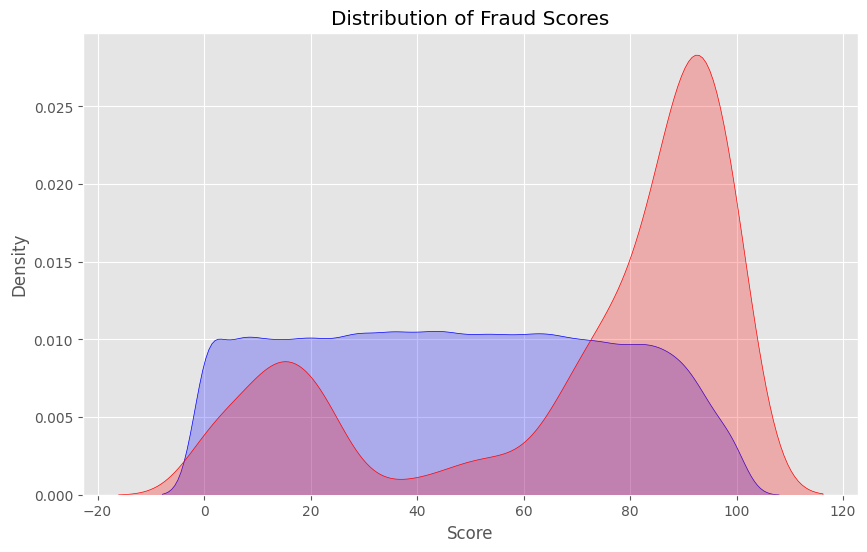

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.kdeplot(df.loc[lambda df : df.fraude==0]['score_fraude_modelo'], ax=ax, color='blue', fill=True)
sns.kdeplot(df.loc[lambda df : df.fraude==1]['score_fraude_modelo'], ax=ax, color='red', fill=True)

plt.title('Distribution of Fraud Scores')
plt.xlabel('Score')
plt.ylabel('Density')
plt.show()

We see that in the previous model, although it separates between fraud and non-fraud, there is a very large intersection area between the curves.

Let's check other metrics to better understand how the model is performing.

In [52]:
# ROC-AUC curve
fpr, tpr, thresholds = roc_curve(df['fraude'], df['score_fraude_modelo'])
roc_auc = auc(fpr, tpr)

print("ROC-AUC:", roc_auc)

ROC-AUC: 0.726275487251462


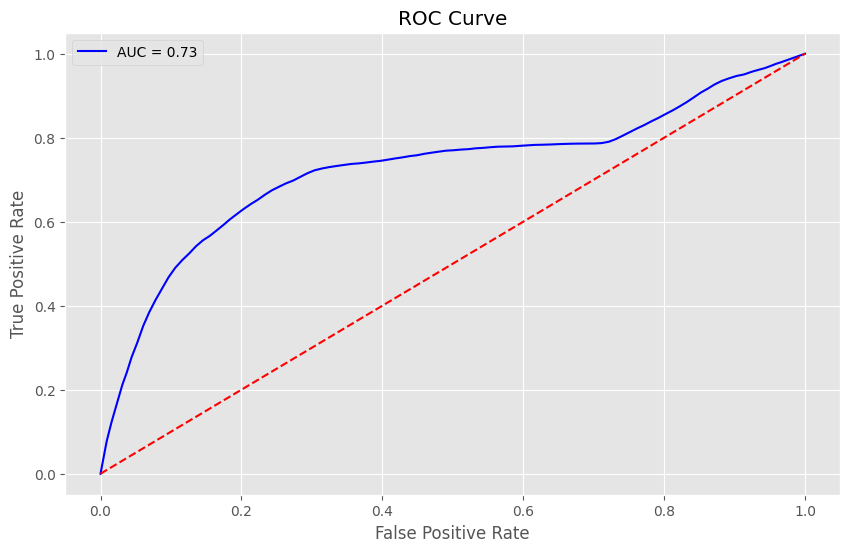

In [53]:
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Let's verify which threashold maximize the profit and other metrics.

In [54]:
def profit_from_decision(decision_df, blocked_col, target_col, amount_col):
    """
    Calculates fraud losses, revenues, and profit based on the given decision dataframe.

    Parameters:
    - decision_df (pd.DataFrame): Dataframe containing decision data
    - blocked_col (str): Name of the column indicating if a transaction was blocked
    - target_col (str): Name of the column indicating if a transaction was a fraud
    - amount_col (str): Name of the column indicating the transaction amount

    Returns:
    pd.Series: Series containing summed values of fraud losses, revenues, and profit
    """

    # Fraud losses: when a transaction was not blocked but it was a fraud
    decision_df["fraud_losses"] = ((~decision_df[blocked_col]) & (decision_df[target_col])) * decision_df[amount_col]

    # Revenues: when a transaction was not blocked and it was not a fraud
    decision_df["revenues"] = ((~decision_df[blocked_col]) & (~decision_df[target_col])) * decision_df[amount_col] * 0.1

    # Profit: Revenues minus Fraud losses
    decision_df["profit"] = decision_df["revenues"] - decision_df["fraud_losses"]

    return decision_df[["fraud_losses", "revenues", "profit"]].sum()

Now we will test all thresholds to block or not a transaction. In other words, if:

**`blocked = score ≥ threshold`**


In [55]:
df_test = X_test_all.merge(y_test_all.to_frame(), how='inner', left_index=True, right_index=True)


target_col = "fraude"
prediction_col = "score_fraude_modelo"
amount_col = "valor_compra"
blocked_col = "blocked"

possible_thresholds = np.arange(1, 100, 1)
all_decisions = []

for threshold in possible_thresholds:
    df_com_decisao = df_test.assign(blocked=lambda df_test: df_test[prediction_col] >= threshold)
    resultado = profit_from_decision(df_com_decisao, blocked_col, target_col, amount_col)
    all_decisions.append(resultado)

threshold_evaluation = pd.concat(all_decisions, axis=1, keys=[s for s in possible_thresholds]).T.rename_axis("threshold").reset_index()

threshold_evaluation


,threshold,fraud_losses,revenues,profit
0,1,1919.64,5047.406,3127.766
1,2,2735.01,6071.587,3336.577
2,3,3771.60,7564.549,3792.949
3,4,4396.45,8843.736,4447.286
4,5,5293.99,10289.643,4995.653
...,...,...,...,...
94,95,124302.05,169655.330,45353.280
95,96,128590.67,171220.775,42630.105
96,97,134104.58,172434.739,38330.159
97,98,138155.64,173309.228,35153.588


In [56]:
# Max profit row
best_decision = threshold_evaluation.loc[threshold_evaluation["profit"].idxmax()]

# Transform the line into a table
best_decision_vertical = best_decision.to_frame().reset_index()
best_decision_vertical.columns = ['métrica', 'valor']

best_decision_vertical


,métrica,valor
0,threshold,79.000
1,fraud_losses,49895.750
2,revenues,134544.535
3,profit,84648.785


In [57]:
print(f"Profit Rate: {(84648.785/134544.535)*100:.2f}%")

Profit Rate: 62.92%


In [58]:

df_test['prediction']= df_test['score_fraude_modelo'] >= best_decision_vertical.loc[0]['valor']
cm= confusion_matrix(df_test['fraude'], df_test['prediction'])

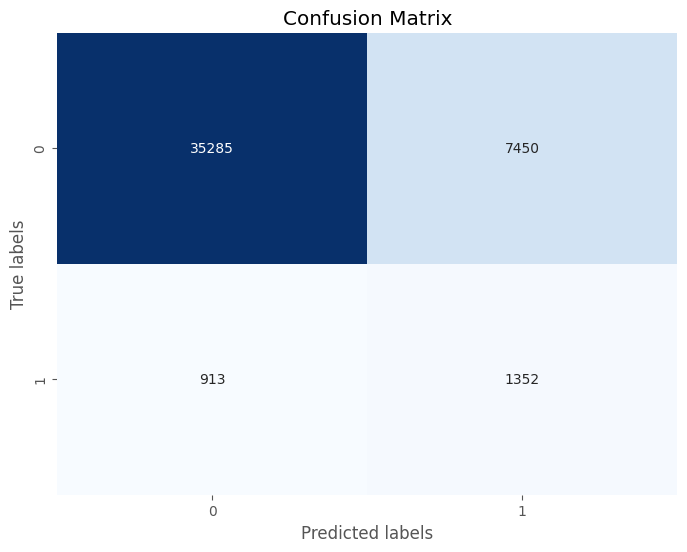

In [59]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(cm)

We want to understand the fraud rate of the model, that is:

**Of all the transactions that the model approved, how many were fraudulent**

we need to have a low rate, meaning the model has to be more conservative in this metric, even if this penalizes false positives (i.e., the model saying it is a fraud when it wasn't).

In [60]:
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

fraud_non_identify = round(FN/(FN+TN), 2)*100
approval_rate = round((TN + FN)/(TN + TP + FN + FP), 2)*100

print(f"Approval Rate: {approval_rate}%" )
print(f"Fraud rate: {fraud_non_identify}%")


Approval Rate: 80.0%
Fraud rate: 3.0%


As we see above, our approval rate is at 80% and the fraud rate is at 3%.

As we have few frauds, if we remove the nulls we have in the dataframe, we might lose fraudulent transactions and have even less data for the model to learn from.

Thus, we will impute values to replace the nulls, being careful to calculate the median value from the training data and imputing it into the test data. This way, we avoid the model seeing the test data before the test, thus preventing data leakage.

In [61]:
with mlflow.start_run(experiment_id=fraud_experiment_id, run_name="baseline_results"):
    # Metrics
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metric("profir_rate",(84648.785 / 134544.535) * 100)
    mlflow.log_metric("approval_rate", approval_rate)
    mlflow.log_metric("fraud_non_identify_rate", fraud_non_identify)

    # Tags
    mlflow.set_tag("model_type", "baseline")
    mlflow.set_tag("source_model", "non_parameters")

    # 3. Log KDE plot
    fig_kde, ax = plt.subplots(1, 1, figsize=(10, 6))
    sns.kdeplot(df.loc[lambda df : df.fraude==0]['score_fraude_modelo'], ax=ax, color='blue', fill=True)
    sns.kdeplot(df.loc[lambda df : df.fraude==1]['score_fraude_modelo'], ax=ax, color='red', fill=True)
    plt.title('Distribution of Fraud Scores')
    plt.xlabel('Score')
    plt.ylabel('Density')
    fig_kde_path = r"C:\Users\vanes\Documents\02-Estudos\DataScienceProjects\Fraud-Prediction\docs\fig\baseline\kde_plot.png"
    fig_kde.savefig(fig_kde_path)
    mlflow.log_artifact(fig_kde_path)
    plt.close(fig_kde)

    # 4. Log ROC curve
    fig_roc = plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    fig_roc_path = r"C:\Users\vanes\Documents\02-Estudos\DataScienceProjects\Fraud-Prediction\docs\fig\baseline\roc_curve.png"
    fig_roc.savefig(fig_roc_path)
    mlflow.log_artifact(fig_roc_path)
    plt.close(fig_roc)

    # 5. Log Confusion Matrix
    fig_cm = plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    fig_cm_path = r"C:\Users\vanes\Documents\02-Estudos\DataScienceProjects\Fraud-Prediction\docs\fig\baseline\confusion_matrix.png"
    fig_cm.savefig(fig_cm_path)
    mlflow.log_artifact(fig_cm_path)
    plt.close(fig_cm)

    # 6. Log DataFrame de thresholds
    csv_path = r"C:\Users\vanes\Documents\02-Estudos\DataScienceProjects\Fraud-Prediction\docs\csvs\baseline\threshold_eval.csv"
    threshold_evaluation.to_csv(csv_path, index=False)
    mlflow.log_artifact(csv_path)

## **5. Pre-processing**

### **5.1. Missing Input:**

In [62]:
#select columns with missing values
cols_with_nan = X_train.select_dtypes(include='number').columns[X_train.select_dtypes(include='number').isna().sum()>0]

#calculating the meadin for each column
median_train = X_train[cols_with_nan].median()

#imputing the missing values
X_train[cols_with_nan] = X_train[cols_with_nan].fillna(median_train)


In [63]:
# Fill the X_test with the X_train meadin to simulate a real scenario
X_test[cols_with_nan] = X_test[cols_with_nan].fillna(median_train)

## **6. Models:**

### **6.1. Logistic Regression with Class Weight**

In [64]:
# Initialize Logistic Regression test
mlflow.start_run(experiment_id=fraud_experiment_id, run_name="Logistic Regression- Class Weight")

# Descriptions and tags
mlflow.set_tags({
    "mlflow.note.content": "Logistic regression using Class Weight and One Hot Encoding for categorical features",
    "class_weight": "balanced",
    "encoding": "one-hot-encoding",
    "model_type": "LogisticRegression"})
    
# Fit model with class_weight method
log_model = LogisticRegression(class_weight='balanced', random_state=42)

# Model training
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [65]:
# make predictions
y_train_proba = log_model.predict_proba(X_train)[:, 1]
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

resultados_previsoes = pd.DataFrame(
                                   {'y_test': y_test,
                                    'y_pred_log_proba': y_pred_proba
                                   }
                                   )

Now, we will evaluate the model predictions using some mains metrics like: ROC-AUC to answer:

**What is the ability of my model to separate positive and negative classes, regardless of the threshold I use?**

The ROC curve tests different thresholds on the probabilities (y_proba), compares them with the true labels (y_test), and thus constructs the ROC curve.

The final score is the AUC (area under this curve).

Although that, we will use the KS metric because it measures how well the model can separate classes 0 and 1 by comparing the distributions of the predicted probabilities (y_proba) for each class.

The maximum value for this metric is 1. The closer the value is to 1, the better the model's ability to distinguish between the two classes.

In [66]:

# Calculate AUC_ROC for training and test samples
train_log_auc = roc_auc_score(y_train, y_train_proba)
test_log_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate KS (Kolmogorov-Smirnov)
ks_statistic, ks_p_value = ks_2samp(
    resultados_previsoes.loc[resultados_previsoes['y_test'] == 1, 'y_pred_log_proba'],
    resultados_previsoes.loc[resultados_previsoes['y_test'] == 0, 'y_pred_log_proba']
)

# Making binary predictions on test sample
y_pred = log_model.predict(X_test)

# Calculate precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

#show results
print(f"AUC Treino: {train_log_auc:.4f}")
print(f"AUC Teste: {test_log_auc:.4f}")
print(f"KS Statistic: {ks_statistic:.4f}")
print(f"KS P-value: {ks_p_value:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

#Save metrics in mlflow

mlflow.log_metric("AUC Train", train_log_auc)
mlflow.log_metric("AUC Test", test_log_auc)
mlflow.log_metric("KS Statistic", ks_statistic)
mlflow.log_metric("KS P-value", ks_p_value)
mlflow.log_metric("Precision- Test", precision)
mlflow.log_metric("Recall- Test", recall)


AUC Treino: 0.7056
AUC Teste: 0.7021
KS Statistic: 0.3024
KS P-value: 0.0000
Precision: 0.1227
Recall: 0.4102


In [67]:
resultados_previsoes

,y_test,y_pred_log_proba
59770,0,0.357142
21362,0,0.481949
127324,0,0.444515
140509,0,0.341500
144297,0,0.403780
...,...,...
89890,0,0.508584
94082,0,0.464045
29674,0,0.347482
92625,0,0.385798


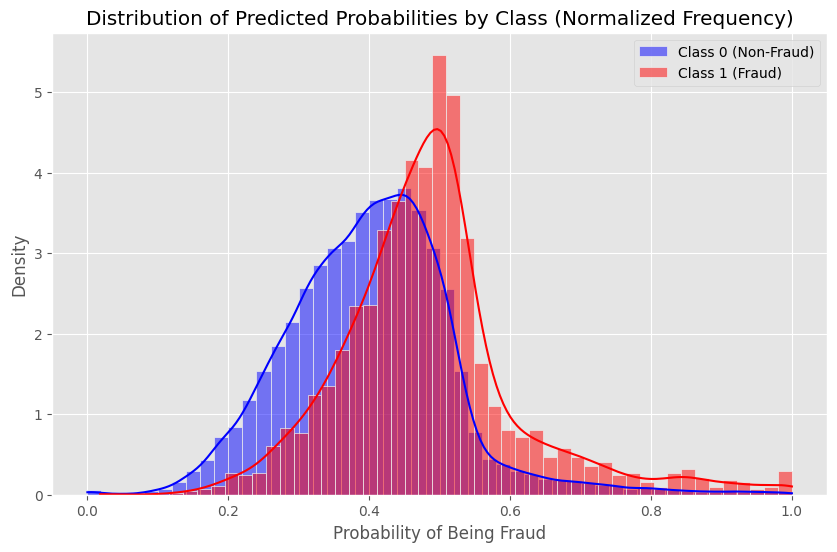

In [68]:
# show the curve
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(resultados_previsoes[resultados_previsoes['y_test'] == 0]['y_pred_log_proba'], bins=50, kde=True, color="b", label="Class 0 (Non-Fraud)", ax=ax, stat="density")
sns.histplot(resultados_previsoes[resultados_previsoes['y_test'] == 1]['y_pred_log_proba'], bins=50, kde=True, color="r", label="Class 1 (Fraud)", ax=ax, stat="density")

plt.title("Distribution of Predicted Probabilities by Class (Normalized Frequency)")
plt.xlabel("Probability of Being Fraud")
plt.ylabel("Density")
plt.legend()
plt.show()

# save plot in MLFlow
fig_kde_path = r"C:\Users\vanes\Documents\02-Estudos\DataScienceProjects\Fraud-Prediction\docs\fig\logistic_regression_balanced\logistic_kde.png"
fig_kde.savefig(fig_kde_path)
mlflow.log_artifact(fig_kde_path)
plt.close(fig_kde)

#Finalize mlflow runs
mlflow.end_run()



**Summary and Interpretation**

- It has a reasonable ability to distinguish between classes (AUC ~0.69).

- It can identify a good portion of fraud cases (Recall ~60%),

- But it is making a lot of mistakes in making these predictions (Precision ~8.8%), that is, it predicts many false positives.

- KS suggests that there is some separation between the score distributions for the two classes.

- However, we have a very large intersection area between the two graphs, meaning it still cannot separate both distributions very well.

### **6.2 Logistic with Undersampling**

In [69]:
#Initialize Logistic Regression test with Undersampling
mlflow.start_run(experiment_id=fraud_experiment_id, run_name="Logistic Regression- Undersampling")

# Descriptions and tags
mlflow.set_tags({
    "mlflow.note.content": "Logistic regression using Undersampling and One Hot Encoding for categorical features",
    "class_weight": "undersampling",
    "encoding": "one-hot-encoding",
    "model_type": "LogisticRegression"})
    
# Fit model
log_model = LogisticRegression(random_state=42)

# Run the RandomUnderSampler only in train dataset
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_train_und, y_train_und = rus.fit_resample(X_train, y_train)

# Model training with the balanced data
log_model.fit(X_train_und, y_train_und)

# Making predictions
y_train_proba = log_model.predict_proba(X_train_und)[:, 1]
y_pred_proba = log_model.predict_proba(X_test)[:, 1]        #Keep X_test

# calculate AUC
train_log_auc = roc_auc_score(y_train_und, y_train_proba)
test_log_auc = roc_auc_score(y_test, y_pred_proba)

# save in dataframe
resultados_previsoes['y_pred_log_proba_und'] = y_pred_proba

# calculate KS
ks_statistic, ks_p_value = ks_2samp(
    resultados_previsoes.loc[resultados_previsoes['y_test'] == 1, 'y_pred_log_proba_und'],
    resultados_previsoes.loc[resultados_previsoes['y_test'] == 0, 'y_pred_log_proba_und'])

# Making binary predictions in test sample
y_pred = log_model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"AUC Treino: {train_log_auc:.4f}")
print(f"AUC Teste: {test_log_auc:.4f}")
print(f"KS Statistic: {ks_statistic:.4f}")
print(f"KS P-value: {ks_p_value:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# save metrics in mlflow
mlflow.log_metric("AUC Train", train_log_auc)
mlflow.log_metric("AUC Test", test_log_auc)
mlflow.log_metric("KS Statistic", ks_statistic)
mlflow.log_metric("KS P_value", ks_p_value)
mlflow.log_metric("Precision- Test", precision)
mlflow.log_metric("Recall- Test", recall)



AUC Treino: 0.7034
AUC Teste: 0.7014
KS Statistic: 0.3029
KS P-value: 0.0000
Precision: 0.1236
Recall: 0.4040


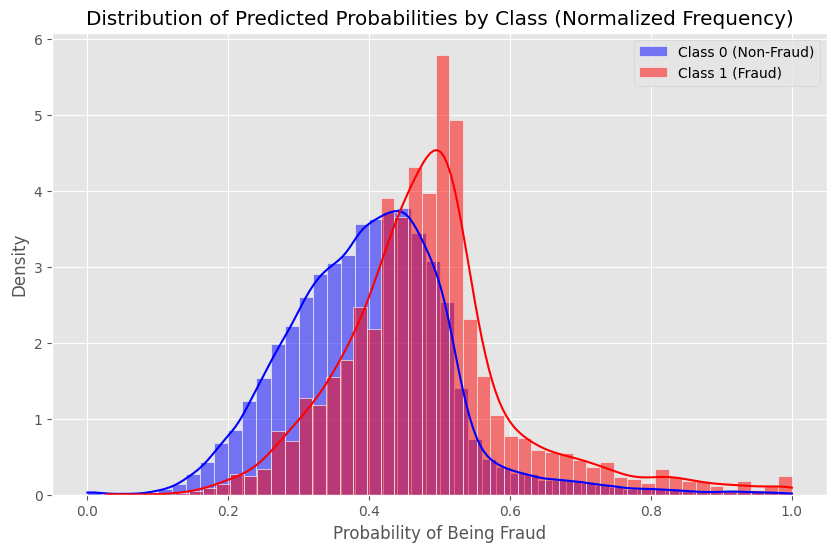

In [70]:
# show the curve
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(resultados_previsoes[resultados_previsoes['y_test'] == 0]['y_pred_log_proba_und'], bins=50, kde=True, color="b", label="Class 0 (Non-Fraud)", ax=ax, stat="density")
sns.histplot(resultados_previsoes[resultados_previsoes['y_test'] == 1]['y_pred_log_proba_und'], bins=50, kde=True, color="r", label="Class 1 (Fraud)", ax=ax, stat="density")

plt.title("Distribution of Predicted Probabilities by Class (Normalized Frequency)")
plt.xlabel("Probability of Being Fraud")
plt.ylabel("Density")
plt.legend()
plt.show()

# save in mlflow artefacts
kde_path = r"C:\Users\vanes\Documents\02-Estudos\DataScienceProjects\Fraud-Prediction\docs\fig\logistic_regression_undersampling\kde_curve.png"
fig_kde.savefig(kde_path)
mlflow.log_artifact(kde_path)
plt.close(fig_kde)

#Finalize mlflow runs
mlflow.end_run()


- The model has good separation between classes (acceptable AUC and KS).
- It is detecting almost half of the frauds (good recall for this type of problem).

However, most of the fraud alerts are false positives (low precision).

### **6.3.: Decision Tree com Class Weight**

Given the imbalance in the target data, we will use Stratified Cross-Validation to ensure that each fold contains samples from both classes, so that the model evaluation is fair and representative.

However, stratification only affects the splitting for validation and does not address class imbalance during model training, which we will handle separately.

Let's understand how well the Decision Tree Classifier separates the two distributions.

In [71]:
# Initialize model test
mlflow.start_run(experiment_id= fraud_experiment_id, run_name="Decision Tree- Baseline" )

# Descriptions and tags
mlflow.set_tags({
    "mlflow.note.content": "Decision Tree using Class Weight, One Hot Encoding for categorical features and cross-validation",
    "class_weight": "balanced",
    "encoding": "one-hot-encoding",
    "model_type": "DecisionTree"})

# Define the model
tree =  DecisionTreeClassifier(random_state=42)

# Creating the StratifiedKfold with 5 folds.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate with cross-validation
scores= cross_val_score (tree, X_train, y_train, cv=skf, scoring='roc_auc')


print("Mean AUC in folds", np.mean(scores))
print("AUC for each fold:", scores)

mlflow.log_metric("AUC- mean", np.mean(scores))
mlflow.end_run()

Mean AUC in folds 0.6007350511524432
AUC for each fold: [0.60844022 0.59502    0.59957146 0.6014788  0.59916477]


The overall performance of the model is modest. It performs only slightly better than a random classifier (AUC = 0.5).

Let's proceed with hyperparameter tuning to try and improve the model's performance.

In [72]:

# Initialize model test
mlflow.start_run(experiment_id= fraud_experiment_id, run_name="Decision Tree- Hyperparameters Tunning" )

# Descriptions and tags
mlflow.set_tags({
    "mlflow.note.content": "Decision Tree with Hyperparameter Tunning",
    "class_weight": "balanced",
    "encoding": "one-hot-encoding",
    "model_type": "DecisionTree"})

# 2. Define the base model with class_weight
tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# 3. Define the parameters space
param_grid = {
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini']
}


# 4. Setup the stratified cross-validation (optional)
#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. Define RandomizedSearchCV with ROC_AUC scoring
grid_search = RandomizedSearchCV(
    tree,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1)

# 6. Training RandomizedSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# 7. Create the best model
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# 8. Evaluate the metrics
y_proba = best_model.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_proba)

print(f"AUC in test sample: {auc_test:.4f}")

# 9. Confusion Matrix
y_pred = best_model.predict(X_test)
print("\nClassification Report in test sample:")
print(classification_report(y_test, y_pred))


# Log parameters
for param, value in grid_search.best_params_.items():
    mlflow.log_param(param,value)

# Log Model
mlflow.sklearn.log_model(best_model, "model")



Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}
AUC in test sample: 0.8244


2025/07/20 12:49:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



Classification Report in test sample:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85     42735
           1       0.14      0.75      0.24      2265

    accuracy                           0.75     45000
   macro avg       0.56      0.75      0.54     45000
weighted avg       0.94      0.75      0.82     45000



2025/07/20 12:49:48 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/07/20 12:49:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


| Metric        | What it means                                                                                            | Importance for Fraud Detection                                                                   |
| ------------- | -------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------ |
| **Precision** | Percentage of predicted fraud cases that are actually fraud (true positives / total predicted positives) | High precision means fewer false alarms, reducing operational costs                              |
| **Recall**    | Percentage of actual fraud cases correctly identified (true positives / total actual positives)          | Very important in fraud detection to catch as many frauds as possible (minimize false negatives) |
| **F1-Score**  | Harmonic mean of precision and recall — balance between the two                                          | Useful to balance detecting fraud and avoiding too many false positives                          |
| **Support**   | Actual number of samples in each class                                                                   | Helps understand class sizes and the impact on metrics                                           |


* **Class 1 (fraud):**

  - Low precision (e.g., 0.14) → many false positives, meaning many flagged frauds are not actual frauds.

  - Relatively high recall (e.g., 0.77) → model detects most of the real fraud cases.

In fraud detection, recall is prioritized to avoid missing frauds.

* **Class 0 (non-fraud):**

  - High precision and lower recall → some legitimate transactions are flagged as fraud (false positives).

  - Overall accuracy is not reliable in fraud problems because the non-fraud class dominates.

In [73]:
# Make predictions in train data
y_train_proba = best_model.predict_proba(X_train)[:,1]
y_train_pred = best_model.predict(X_train)
y_pred_proba = best_model.predict_proba(X_test)[:,1]
y_pred = best_model.predict(X_test)


resultados_previsoes_tree = pd.DataFrame(
                                   {'y_test': y_test,
                                    'y_pred_proba': y_pred_proba,
                                    'y_pred': y_pred
                                   }
                                   )

# Calculate AUC_ROC for training and test samples
train_tree_auc = roc_auc_score(y_train, y_train_proba)
test_tree_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate KS (Kolmogorov-Smirnov)
ks_statistic, ks_p_value = ks_2samp(
    resultados_previsoes_tree.loc[resultados_previsoes_tree['y_test'] == 1, 'y_pred_proba'],
    resultados_previsoes_tree.loc[resultados_previsoes_tree['y_test'] == 0, 'y_pred_proba']
)


# Calculate precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

#show results
print(f"AUC Treino: {train_tree_auc:.4f}")
print(f"AUC Teste: {test_tree_auc:.4f}")
print(f"KS Statistic: {ks_statistic:.4f}")
print(f"KS P-value: {ks_p_value:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

#save metrics in mlflow
mlflow.log_metric("AUC Train", train_tree_auc)
mlflow.log_metric("AUC Test", test_tree_auc)
mlflow.log_metric("KS Statistic", ks_statistic)
mlflow.log_metric("KS P_value", ks_p_value)
mlflow.log_metric("Precision- Test", precision)
mlflow.log_metric("Recall- Test", recall)


AUC Treino: 0.8316
AUC Teste: 0.8244
KS Statistic: 0.5075
KS P-value: 0.0000
Precision: 0.1393
Recall: 0.7541


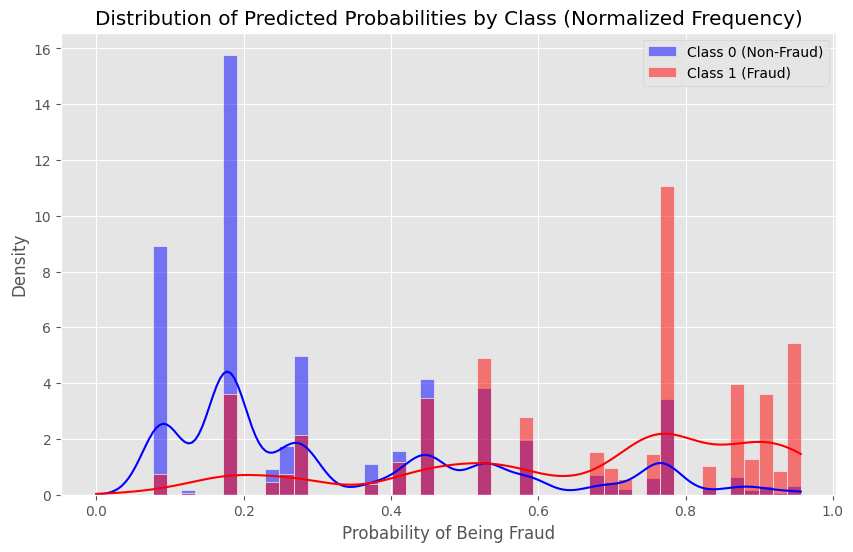

In [74]:
# Show and save the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(resultados_previsoes_tree[resultados_previsoes_tree['y_test'] == 0]['y_pred_proba'], bins=50, kde=True, color="b", label="Class 0 (Non-Fraud)", ax=ax, stat="density")
sns.histplot(resultados_previsoes_tree[resultados_previsoes_tree['y_test'] == 1]['y_pred_proba'], bins=50, kde=True, color="r", label="Class 1 (Fraud)", ax=ax, stat="density")

ax.set_title("Distribution of Predicted Probabilities by Class (Normalized Frequency)")
ax.set_xlabel("Probability of Being Fraud")
ax.set_ylabel("Density")
ax.legend()

# Save
kde_path = r"C:\Users\vanes\Documents\02-Estudos\DataScienceProjects\Fraud-Prediction\docs\fig\decision_tree_tunning\kde_curve_v1.png"
fig.savefig(kde_path)
mlflow.log_artifact(kde_path)
plt.show() 
plt.close(fig)


In [75]:
cm= confusion_matrix(resultados_previsoes_tree['y_test'], resultados_previsoes_tree['y_pred'])

In [76]:
fig_cm = plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
fig_cm_path = r"C:\Users\vanes\Documents\02-Estudos\DataScienceProjects\Fraud-Prediction\docs\fig\decision_tree_tunning\confusion_matrix.png"
fig_cm.savefig(fig_cm_path)
mlflow.log_artifact(fig_cm_path)
plt.close(fig_cm)

In [77]:
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

fraud_non_identify = round(FN/(FN+TN), 2)*100
approval_rate = round((TN + FN)/(TN + TP + FN + FP), 2)*100

print(f"Approval Rate: {approval_rate}%" )
print(f"Fraud rate: {fraud_non_identify}%")

mlflow.log_metric("Approval Rate", approval_rate)
mlflow.log_metric("Fraud Rate", fraud_non_identify)

Approval Rate: 73.0%
Fraud rate: 2.0%


In [78]:
mlflow.end_run()

Here we see a significant improvement over logistic regression. Let's test how the model behaves by undersampling for balancing.

### **6.4. Decision Tree with Undersampling**

In [79]:
mlflow.start_run(experiment_id= fraud_experiment_id, run_name= "Decision Tree with Undersampling")

# Descriptions and tags
mlflow.set_tags({
    "mlflow.note.content": "Decision Tree using Undersampling, One Hot Encoding for categorical features",
    "class_weight": "undersampling",
    "encoding": "one-hot-encoding",
    "model_type": "DecisionTree"})

# Create the Decision Tree Model
tree_und = DecisionTreeClassifier(random_state=42)

# Make Undersampling
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_train_und, y_train_und = rus.fit_resample(X_train, y_train)

# Define the hyperparameter space using BayesSearchCV
param_grid = {
    'max_depth': (3,10),
    'min_samples_split': (2,10),
    'min_samples_leaf': (1,15),
    'criterion':['gini', 'entropy']
}

# Setup the BayesSearchCV
tree_opt = BayesSearchCV(
    estimator= tree_und,
    search_spaces = param_grid,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Save the best model
best_tree_und = tree_opt.fit(X_train_und, y_train_und)

# Show the best parameters
print(f"Best Hyperparameters: {best_tree_und.best_params_}")

# Make predictions
y_train_proba = best_tree_und.predict_proba(X_train_und)[:,1]
y_train_pred = best_tree_und.predict(X_train_und)
y_pred_proba = best_tree_und.predict_proba(X_test)[:,1]
y_pred = best_tree_und.predict(X_test)

# Save results
resultados_previsoes_tree['y_pred_proba_und'] = y_pred_proba

# Calculate AUC for train and test samples
train_tree_auc = roc_auc_score(y_train_und, y_train_proba)
test_tree_auc = roc_auc_score(y_test, y_pred_proba)

# making KS test
ks_statistic, ks_p_value = ks_2samp(
    resultados_previsoes_tree.loc[resultados_previsoes_tree['y_test']==1, 'y_pred_proba_und'],
    resultados_previsoes_tree.loc[resultados_previsoes_tree['y_test']==0, 'y_pred_proba_und']
)

# Calculate recall and precision scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# show results
print(f"AUC Treino: {train_tree_auc:.4f}")
print(f"AUC Teste: {test_tree_auc:.4f}")
print(f"KS Statistic: {ks_statistic:.4f}")
print(f"KS P-value: {ks_p_value:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Log parameters
for param, value in grid_search.best_params_.items():
    mlflow.log_param(param,value)

# Log Model
mlflow.sklearn.log_model(best_model, "model")

mlflow.log_metric("AUC Train", train_tree_auc)
mlflow.log_metric("AUC Test", test_tree_auc)
mlflow.log_metric("KS Statistic", ks_statistic)
mlflow.log_metric("KS P_value", ks_p_value)
mlflow.log_metric("Precision- Test", precision)
mlflow.log_metric("Recall- Test", recall)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

2025/07/20 12:50:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


AUC Treino: 0.8455
AUC Teste: 0.8235
KS Statistic: 0.5125
KS P-value: 0.0000
Precision: 0.1386
Recall: 0.7554


2025/07/20 12:50:35 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/07/20 12:50:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     42735
           1       0.14      0.76      0.23      2265

    accuracy                           0.75     45000
   macro avg       0.56      0.75      0.54     45000
weighted avg       0.94      0.75      0.82     45000



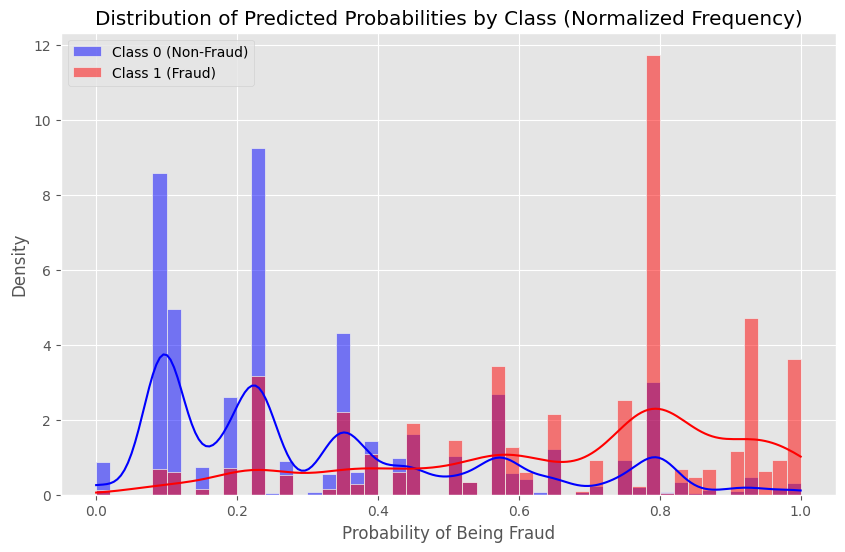

In [81]:
# show the curve
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(resultados_previsoes_tree[resultados_previsoes_tree['y_test'] == 0]['y_pred_proba_und'], bins=50, kde=True, color="b", label="Class 0 (Non-Fraud)", ax=ax, stat="density")
sns.histplot(resultados_previsoes_tree[resultados_previsoes_tree['y_test'] == 1]['y_pred_proba_und'], bins=50, kde=True, color="r", label="Class 1 (Fraud)", ax=ax, stat="density")

plt.title("Distribution of Predicted Probabilities by Class (Normalized Frequency)")
plt.xlabel("Probability of Being Fraud")
plt.ylabel("Density")
plt.legend()

# Save
kde_path = r"C:\Users\vanes\Documents\02-Estudos\DataScienceProjects\Fraud-Prediction\docs\fig\decision_tree_undersampling\kde_curve_v1.png"
fig.savefig(kde_path)
mlflow.log_artifact(kde_path)
plt.show()
plt.close(fig)

- AUC and KS show that the model has good overall ability to discriminate between fraud and non-fraud.

- High Recall (0.72) is positive for fraud, as the model identifies most fraud.

- Low Precision (0.15) indicates many false positives - warning of high operating costs in manual analysis.

You can see that when we applied Undersampling, our recall fell by 5% compared to the **Decison Tree using class weight**. We're therefore going to choose for the previous model for the time being. Since the more frauds we can identify without penalizing precision too much, the better it will be for the business.

In [82]:
mlflow.end_run()

### **Random Forest with class weight**

In [83]:
mlflow.start_run(experiment_id=fraud_experiment_id, run_name="Random Forest- Class Weight")

# Descriptions and tags
mlflow.set_tags({
    "mlflow.note.content": "Random Forest using Class Weight, One Hot Encoding for categorical features with Tunnning",
    "class_weight": "balanced",
    "encoding": "one-hot-encoding",
    "model_type": "RandomForest"})

# Create a RandomFores with class_weight
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define hyperparameters space
param_grid ={
    'max_depth': (3,8),            #max depth tree
    'min_samples_split': (2,10),    # min quantity of samples to separate a node
    'min_samples_leaf': (2,30),     # min quantity samples in each leaf
    'n_estimators': (10,50)        # number of trees in the forest
}

# Seach for best hyperparameters
rf_opt = BayesSearchCV(
    estimator= rf,
    search_spaces= param_grid,
    n_iter=30,
    cv = 5,
    scoring= 'roc_auc',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Save the best model
best_rf = rf_opt.fit(X_train, y_train)

# Show the best hyperparameters
print(f"Best Hyperparameters: {best_rf.best_params_}")

# making predictions
y_train_proba = best_rf.predict_proba(X_train)[:,1]
y_train_pred = best_rf.predict(X_train)
y_proba = best_rf.predict_proba(X_test)[:,1]
y_pred = best_rf.predict(X_test)

# Save results
resultados_previsoes_rf = pd.DataFrame({
    'y_test': y_test,
    'y_proba': y_proba
})

# Calculate AUC for train and test samples
train_rf_auc = roc_auc_score(y_train, y_train_proba)
test_rf_auc = roc_auc_score(y_test, y_proba)

# KS Test
ks_statistic, ks_p_value = ks_2samp(
    resultados_previsoes_rf[resultados_previsoes_rf['y_test']==1]['y_proba'],
    resultados_previsoes_rf[resultados_previsoes_rf['y_test']==0]['y_proba']
)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# show results
print(f"AUC Train: {train_tree_auc:.4f}")
print(f"AUC Test: {test_tree_auc:.4f}")
print(f"KS Statistic: {ks_statistic:.4f}")
print(f"KS P-value: {ks_p_value:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Log parameters
for param, value in best_rf.best_params_.items():
    mlflow.log_param(param,value)

# Log Model
mlflow.sklearn.log_model(best_rf, "model")

# save metrics in mlflow
mlflow.log_metric("AUC Train", train_rf_auc)
mlflow.log_metric("AUC Test", test_rf_auc)
mlflow.log_metric("KS Statistic", ks_statistic)
mlflow.log_metric("KS P_value", ks_p_value)
mlflow.log_metric("Precision- Test", precision)
mlflow.log_metric("Recall- Test", recall)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

2025/07/20 12:53:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


AUC Train: 0.8455
AUC Test: 0.8235
KS Statistic: 0.5129
KS P-value: 0.0000
Precision: 0.1680
Recall: 0.6658


2025/07/20 12:53:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/07/20 12:53:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     42735
           1       0.17      0.67      0.27      2265

    accuracy                           0.82     45000
   macro avg       0.57      0.75      0.58     45000
weighted avg       0.94      0.82      0.86     45000



In [85]:
# show the curve
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(resultados_previsoes_rf[resultados_previsoes_rf['y_test'] == 0]['y_proba'], bins=50, kde=True, color="b", label="Class 0 (Non-Fraud)", ax=ax, stat="density")
sns.histplot(resultados_previsoes_rf[resultados_previsoes_rf['y_test'] == 1]['y_proba'], bins=50, kde=True, color="r", label="Class 1 (Fraud)", ax=ax, stat="density")

plt.title("Distribution of Predicted Probabilities by Class (Normalized Frequency)")
plt.xlabel("Probability of Being Fraud")
plt.ylabel("Density")
plt.legend()

#sabe in mlflow artefacts
kde_path = r"C:\Users\vanes\Documents\02-Estudos\DataScienceProjects\Fraud-Prediction\docs\fig\random_forest\kde_curve_v1.png"
fig.savefig(kde_path)
mlflow.log_artifact(kde_path)
plt.close(fig)
plt.show()

In [86]:
mlflow.end_run()

In the Random Forest model, our recall for class 1 was lower than the previous model. In other words, of all our frauds, the model is only finding 65%.

### **XGBoost Classifier**

In [87]:
mlflow.start_run(experiment_id=fraud_experiment_id, run_name="XGBoost- Class Weight")

# Descriptions and tags
mlflow.set_tags({
    "mlflow.note.content": "XGBoost using Class Weight, One Hot Encoding for categorical features with Tunnning",
    "class_weight": "balanced",
    "encoding": "one-hot-encoding",
    "model_type": "XGBoost"})


In [88]:
from xgboost import XGBRFClassifier
from skopt import BayesSearchCV

# Create XGBClassifier with class weight
xgb = XGBRFClassifier(random_state=42, class_weight='balanced')

# Define hyperparamegters space
param_grid ={
    'max_depth': (3,8),            # max depth tree
    'min_samples_split': (2,10),    # min quantity of samples to separate a node
    'min_samples_leaf': (2,30),     # min quantity samples in each leaf
    'n_estimators': (10,50)        # number of trees in the forest
}

# Search for best parameters
xgb_opt = BayesSearchCV(
    estimator= xgb,
    search_spaces= param_grid,
    n_iter=30,
    cv = 5,
    scoring = 'roc_auc',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

#Save the best model
best_xgb = xgb_opt.fit(X_train, y_train)

# Show the best parameters
print(f"Best Hyperparameters: {best_xgb.best_params_}")

# Make predictions
y_train_proba = best_xgb.predict_proba(X_train)[:,1]
y_train_pred = best_xgb.predict(X_train)
y_proba = best_xgb.predict_proba(X_test)[:,1]
y_pred = best_xgb.predict(X_test)

# Save results
resultados_previsoes_xgb = pd.DataFrame({
    'y_test': y_test,
    'y_proba': y_proba
})

#Calculate AUC
train_xgb_auc = roc_auc_score(y_train, y_train_proba)
test_xgb_auc = roc_auc_score(y_test, y_proba)

# KS test
ks_statistic, ks_p_value = ks_2samp(
    resultados_previsoes_xgb[resultados_previsoes_xgb['y_test']==1]['y_proba'],
    resultados_previsoes_xgb[resultados_previsoes_xgb['y_test']==0]['y_proba']
)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

#show results
print(f"AUC Train: {train_xgb_auc:.4f}")
print(f"AUC Test: {test_xgb_auc:.4f}")
print(f"KS Statistic: {ks_statistic:.4f}")
print(f"KS P-value: {ks_p_value:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [89]:
# Log parameters
for param, value in best_xgb.best_params_.items():
    mlflow.log_param(param,value)

# Log Model
mlflow.sklearn.log_model(best_xgb, "model")

# save metrics in mlflow
mlflow.log_metric("AUC Train", train_xgb_auc)
mlflow.log_metric("AUC Test", test_xgb_auc)
mlflow.log_metric("KS Statistic", ks_statistic)
mlflow.log_metric("KS P_value", ks_p_value)
mlflow.log_metric("Precision- Test", precision)
mlflow.log_metric("Recall- Test", recall)

mlflow.end_run()

2025/07/20 12:58:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


2025/07/20 12:58:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/07/20 12:58:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost gave us worse metrics than the decision tree model. It is also more computationally expensive.

So, for now, the best model (taking into account the feature engineering that was carried out) was the ***Decision Tree with class weight***.


### **6.4.: KNN**

To use KNN, we have to adopt another strategy to handle categorical variables. Since we have a column with over 600 categories, we would end up with hundreds of columns, which can confuse KNN as it is based on distance.

In other words, when we significantly increase the dimensionality of the data, the model may struggle to identify differences between distances and end up either guessing values or overfitting.


Another point is the computational cost, which ends up being expensive. So we will used it the Label Encoding to deal with categorical features.

Let's return to our dataset with the features before treating the categorical variables, so we can apply Label Encoding. As the KNN model is based on distances, we will also have to standardize the data. To do this, we'll use the MinMax scaler.

In [90]:
# restore the original dataset with features
X_original = X_backup.copy()

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Split X_original into train and test
X_train_all, X_test_all, y_train, y_test = train_test_split(X_original, y, test_size=0.3, random_state=42)

# Select numerical and categorical columns
num_col = X_train_all.select_dtypes(include=['int64', 'float64']).columns.to_list()
cat_col = X_train_all.select_dtypes(include=['object']).columns.to_list()

#select columns with missing values
cols_with_nan = X_train_all.select_dtypes(include='number').columns[X_train_all.select_dtypes(include='number').isna().sum()>0]

#calculating the meadin for each column
median_train = X_train_all[cols_with_nan].median()

#imputing the missing values
X_train_all[cols_with_nan] = X_train_all[cols_with_nan].fillna(median_train)

# Fill the X_test with the X_train meadin to simulate a real scenario
X_test_all[cols_with_nan] = X_test_all[cols_with_nan].fillna(median_train)

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = X_train_all.copy()
X_test_scaled = X_test_all.copy()
X_train_scaled[num_col] = scaler.fit_transform(X_train_all[num_col])
X_test_scaled[num_col] = scaler.transform(X_test_all[num_col])

In [92]:
# Drop target model
X_train_scaled = X_train_scaled.drop(columns=['score_fraude_modelo'])
X_test_scaled = X_test_scaled.drop(columns=['score_fraude_modelo'])

# Applies Label Encoding
for col in cat_col:
    le = LabelEncoder()
    # Fit in train data
    X_train_scaled[col] = le.fit_transform(X_train_scaled[col])
    # Applies in teste
    X_test_scaled[col] = X_test_scaled[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)
    # Ensure that all categories in train data are in test data
    le_classes = list(le.classes_)
    le_classes.extend([x for x in X_test_scaled[col].unique() if x not in le_classes])
    le.classes_ = np.array(le_classes)
    X_test_scaled[col] = le.transform(X_test_scaled[col])


In [93]:
# ✅ Check if all categories were preserved
print("Label Encoding applied successfully!")
print("Unique categories before encoding:", X_test_scaled["grupo_categorias"].nunique())
print("Unique values after encoding:", X_test_scaled["grupo_categorias"].nunique())
print("Unique categories before encoding:", X_test_scaled["paises_agrupados"].nunique())
print("Unique values after encoding:", X_test_scaled["paises_agrupados"].nunique())

Label Encoding applied successfully!
Unique categories before encoding: 685
Unique values after encoding: 685
Unique categories before encoding: 3
Unique values after encoding: 3


KNN is a model based on the distance of the K nearest neighboring points. The weights parameter in **KNeighborsClassifier** controls how the neighbors affect the prediction. With:
- `weights="uniform"`: all neighbors will have the same weight, and the majority class among the `k` neighbors defines the prediction, which can lead to stricter classifications.
- `weights="distance"`: the `k` closest neighbors have more influence, making predictions smoother and allowing for the proper use of `predict_proba()`.

In our case, we want more reliable predictions, so we will use `weights="distance"`, as the model will calculate probabilities taking into account the distance between points. This improves class separation and reduces extreme prediction issues.

In [94]:
mlflow.start_run(experiment_id=fraud_experiment_id, run_name="KNN with Undersampling")

# Descriptions and tags
mlflow.set_tags({
    "mlflow.note.content": "KNN with Undersampling, Label Encoding for categorical features",
    "class_weight": "undersampling",
    "encoding": "label encoding",
    "model_type": "KNN"})

In [95]:
from sklearn.neighbors import KNeighborsClassifier

# create model
knn = KNeighborsClassifier(n_neighbors=50, weights='distance')

# Run the RandomUnderSampler only in train dataset
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_train_und, y_train_und = rus.fit_resample(X_train_scaled, y_train)


In [96]:
# Training the model
knn.fit(X_train_und, y_train_und)

# Make Predictions
y_train_proba = knn.predict_proba(X_train_und)[:,1]
y_train_pred = knn.predict(X_train_und)
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]
y_pred = knn.predict(X_test_scaled)

# save results
resultados_previsoes_knn = pd.DataFrame({
    'y_test': y_test,
    'y_proba': y_pred_proba
})

# Calculate AUC
train_knn_auc = roc_auc_score(y_train_und, y_train_proba)
test_knn_auc = roc_auc_score(y_test, y_pred_proba)


# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

#Show results
print(f"AUC Treino: {train_knn_auc:.4f}")
print(f"AUC Teste: {test_knn_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")



AUC Treino: 1.0000
AUC Teste: 0.7576
Precision: 0.2593
Recall: 0.1784


In [97]:

# save metrics in mlflow
mlflow.log_metric("AUC Train", train_knn_auc)
mlflow.log_metric("AUC Test", test_knn_auc)
mlflow.log_metric("Precision- Test", precision)
mlflow.log_metric("Recall- Test", recall)

mlflow.end_run()

KNN is overfitting. Let's move on to Naive Bayes.

### **Naive Bayes**

In [98]:
mlflow.start_run(experiment_id=fraud_experiment_id, run_name="NaiveBayes- Underdsampling")

# Descriptions and tags
mlflow.set_tags({
    "mlflow.note.content": "NaiveBayes using Undersampling, Label Encoding for categorical features",
    "class_weight": "undersampling",
    "encoding": "label encoding",
    "model_type": "NaiveBayes"})

In [99]:
from sklearn.naive_bayes import GaussianNB

#Create naive bayes model
naive = GaussianNB()

# Training model with undersampling sample
naive.fit(X_train_und, y_train_und)

# make predictions
y_train_proba = naive.predict_proba(X_train_und)[:,1]
y_train_pred = naive.predict(X_train_und)
y_pred_proba = naive.predict_proba(X_test_scaled)[:,1]
y_pred = naive.predict(X_test_scaled)

#save results
resultados_previsoes_naive = pd.DataFrame({
    'y_test': y_test,
    'y_proba': y_pred_proba
})

# Calculate AUC
train_naive_auc = roc_auc_score(y_train_und, y_train_proba)
test_naive_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate ks
ks_statistic, ks_p_value = ks_2samp(
    resultados_previsoes_naive[resultados_previsoes_naive['y_test']==0]['y_proba'],
    resultados_previsoes_naive[resultados_previsoes_naive['y_test']==1]['y_proba']
)

# calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

#Show results
print(f"AUC Treino: {train_naive_auc:.4f}")
print(f"AUC Teste: {test_naive_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")



AUC Treino: 0.7799
AUC Teste: 0.7395
Precision: 0.1549
Recall: 0.2799


In [100]:
# save metrics in mlflow
mlflow.log_metric("AUC Train", train_naive_auc)
mlflow.log_metric("AUC Test", test_naive_auc)
mlflow.log_metric("Precision- Test", precision)
mlflow.log_metric("Recall- Test", recall)

mlflow.end_run()

According to our tests, the final model chosen was ***Decision Tree with Class Weight***.

To ensure consistency in the data, we will retrain the model using the same process as before. Then we'll do the threshold adjustment.

## **FINAL MODEL: DECISION TREE USING CLASS WEIGHT**

In [101]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

# 2. Define the base model with class_weight
tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# 3. Define the parameters space
param_grid = {
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini']
}


# 4. Setup the stratified cross-validation (optional)
#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. Define RandomizedSearchCV with ROC_AUC scoring
grid_search = RandomizedSearchCV(
    tree,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1)

# 6. Training RandomizedSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# 7. Create the best model
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)

# 8. Evaluate the metrics
y_proba = best_model.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_proba)

print(f"AUC in test sample: {auc_test:.4f}")

# 9. Confusion Matrix
y_pred = best_model.predict(X_test)
print("\nClassification Report in test sample:")
print(classification_report(y_test, y_pred))

# Make predictions
y_train_proba = best_model.predict_proba(X_train)[:,1]
y_train_pred = best_model.predict(X_train)
y_pred_proba = best_model.predict_proba(X_test)[:,1]
y_pred = best_model.predict(X_test)


resultados_previsoes_tree = pd.DataFrame(
                                   {'y_test': y_test,
                                    'y_pred_proba': y_pred_proba,
                                    'y_pred': y_pred
                                   }
                                   )

# Calculate AUC_ROC for training and test samples
train_tree_auc = roc_auc_score(y_train, y_train_proba)
test_tree_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate KS (Kolmogorov-Smirnov)
ks_statistic, ks_p_value = ks_2samp(
    resultados_previsoes_tree.loc[resultados_previsoes_tree['y_test'] == 1, 'y_pred_proba'],
    resultados_previsoes_tree.loc[resultados_previsoes_tree['y_test'] == 0, 'y_pred_proba']
)


# Calculate precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

#show results
print(f"AUC Treino: {train_tree_auc:.4f}")
print(f"AUC Teste: {test_tree_auc:.4f}")
print(f"KS Statistic: {ks_statistic:.4f}")
print(f"KS P-value: {ks_p_value:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")



Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}
AUC in test sample: 0.8244

Classification Report in test sample:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85     42735
           1       0.14      0.75      0.24      2265

    accuracy                           0.75     45000
   macro avg       0.56      0.75      0.54     45000
weighted avg       0.94      0.75      0.82     45000

AUC Treino: 0.8316
AUC Teste: 0.8244
KS Statistic: 0.5075
KS P-value: 0.0000
Precision: 0.1393
Recall: 0.7541


### **Financial Return**

Now, let's calculate the financial return we have obtained with our new model compared to the previous model.

From our analysis of the previous model's score, we see that with the current model, there is a loss of approximately 49 thousand due to frauds, a gain of 134 thousand, and finally, a profit of 86 thousand. It is therefore important to note that these figures are based on stick figures and are not related to the company's strategy.

In [102]:
best_decision_vertical

,métrica,valor
0,threshold,79.000
1,fraud_losses,49895.750
2,revenues,134544.535
3,profit,84648.785


In [103]:
df_test = X_test_all[["valor_compra", "score_fraude_modelo"]]
df_test["score_fraude_modelo"] = df_test["score_fraude_modelo"]/100
df_test["fraude"]= y_test
df_test["score_tree"] = y_pred_proba

In [104]:
# Define columns
target_col = "fraude"
prediction_col = "score_tree"
amount_col = "valor_compra"
blocked_col = "blocked"

In [105]:
possible_thresholds = np.arange(0, 1, 0.01)
all_decisions = []

for threshold in possible_thresholds:
    df_with_decision = df_test.assign(blocked=lambda df_test: df_test[prediction_col]>= threshold)
    result = profit_from_decision(df_with_decision, blocked_col, target_col, amount_col)
    all_decisions.append(result)

threshold_evaluation = pd.concat(all_decisions, axis=1, keys=[s for s in possible_thresholds]).T.rename_axis("threshold").reset_index()

threshold_evaluation

,threshold,fraud_losses,revenues,profit
0,0.00,0.00,0.000,0.000
1,0.01,256.16,19.433,-236.727
2,0.02,256.16,19.433,-236.727
3,0.03,256.16,19.433,-236.727
4,0.04,256.16,19.433,-236.727
...,...,...,...,...
95,0.95,140910.29,176337.118,35426.828
96,0.96,159035.89,177317.392,18281.502
97,0.97,159035.89,177317.392,18281.502
98,0.98,159035.89,177317.392,18281.502


In [106]:
threshold_evaluation.profit.max()

91121.11300000001

In [107]:
# Max profit row
best_decision = threshold_evaluation.loc[threshold_evaluation["profit"].idxmax()]

# Transform the line into a table
best_decision_vertical = best_decision.to_frame().reset_index()
best_decision_vertical.columns = ['métrica', 'valor']

best_decision_vertical

,métrica,valor
0,threshold,0.590
1,fraud_losses,59939.170
2,revenues,151060.283
3,profit,91121.113


In [108]:
#profit rate
profit_revenue = (92759.546/129708.996)*100
profit_revenue


71.51357952072962

Therefore, our profit-maximizing threshold is 0.47, which gives us a profit percentage of approximately 71.5%, almost 10% higher than what the company had with the previous model.

So for any transaction with a score above this value, we will block the transaction and mark it as fraudulent.

In [109]:
df_test["y_pred_new"] = np.where(df_test["score_tree"]>= 0.47, 1, 0)

In [110]:
# Approval rate: % of transactions that were approved (y_pred_new == 0)
approval_rate = (df_test["y_pred_new"] == 0).mean()

# Fraud rate: % of fraudulent transactions within approved ones
fraud_rate_approved = df_test.loc[df_test["y_pred_new"] == 0, "fraude"].mean()

# Show results
print(f"Taxa de Aprovação: {approval_rate:.2%}")
print(f"Taxa de Fraude entre as Aprovadas: {fraud_rate_approved:.2%}")

Taxa de Aprovação: 72.75%
Taxa de Fraude entre as Aprovadas: 1.70%


Compared to the baseline model, we reduced the fraud score from 3% to less than 2%, with an approval rate of 72%.

The model became a little more conservative in terms of approvals. However, in this way, we minimized fraud and increased the company's profit, as was the proposed objective.